In [ ]:
https://towardsdatascience.com/wtf-is-image-classification-8e78a8235acb
    

# Project Overview and Business Problem

The overall goal of this project was to utalized machine learning classification techniques to predict the individual diagnoses of Alzheimer's Disease severity from a single cross-sectional structural brain MRI scan. A convolutional neural network (CNN) was built out and trained on pre-diagnosed MRI images acquired using a 1.5 Tesla MRI scanner that were sourced from various seperate studies. The final model showed high performance (ACCURACTY PERCENT) on accurately classifying the severity of an alzhimer's disease into the four target categories; "No Impairment", "Very Mild Impairment", "Mild Impairment", and "Moderate Impairment". CNNS and other machine learning models are powerful tools that may be able to reduce the load on clinicians by aiding in the individual diagnosis of patients along the AD continuum. 

**
One of the most important caveats of previous works is the single-center origin of imaging data that limits the generalizability of findings. In light of this, one of the main goal and novelty of our study was to overcome this limit by comparing data from different centers, neuroimaging protocols and scanners, in order to reach both reliability and reproducibility of results.


# Background 

Alzheimer's Disease (AD) is a the most common neurodegenerative disorder effecting about 1 in 9 people over the age of 65 and older with estimates that the population of those living with AD will just about double by 2050 compared to current numbers[1]. AD is the leading cause of dementia, being associated with up to 80% of all dementia diagnosises. Dementia is the clinical syndrome characterized by progressive decline in two or more cognitive domains, including memory, language, executive and visuospatial function, personality, and behavior, these can cause the loss of abilities to perform instrumental and/or basic activities of daily living[3].


Mild cognitive impairment (MCI) is the prodromal form of AD and is characterized by neurocognitive dysfunction, but not to the extent of dementia, and minor difficulties in functional ability. 

Magnetic Resonance Imaging (MRI) is a vital resource used in the clincial assement of patients with suspected Alzheimer disease, allowing clinicans to observe in vivo visualization of the neuropathology. Diagnostic criteria recommend the consideration of structural abnormalities visible through MRI, atrophy of the medial temporal structures as well as others are now considered valid diagnositc markers. More advanced magnetic resonance techniques such as magnetic resonance spectroscopy (MRS), diffusion tensor imaging (DTI), and functional magnetic resonance imaging (fMRI) exist but have not yet implemented into standard clinical use.
**

Several studies have shown that atrophy estimates in characteristically vulnerable brain regions, particularly the hippocampus and entorhinal cortex, reflect disease stage and are predictive of progression of mild cognitive impairment (MCI) to AD (Frisoni et al., 2010)

Structural imaging modalities such as MRIs can reveal brain atrophy and other static tissue abnormalities. Progression of atrophy follows the Braak staging diagnostic scheme for AD and is first observed in medial temporal lobe structures, including the entorhinal cortex and hippocampus. As the disease progresses, atrophy advances to the point in which grey matter loss occurs in the medial temporal gyrus, parahippocampus, parahippocampal and fusiform gyri, and temporal pole.

Structural MRI scans can also display white matter hyperintensities (WMHs), which indicate demyelination and axonal loss. Compared to controls, patients with AD demonstrate greater WMHs with the majority in frontal lobe. For patients along the AD spectrum, WMHs correlate with hippocampal atrophy, in addition to neuropsychological impairment and psychiatric disturbances.

sources: 
1. https://www.alz.org/alzheimers-dementia/facts-figures#:~:text=More%20than%206%20million%20Americans%20of%20all%20ages%20have%20Alzheimer's,older%20(10.7%25)%20has%20Alzheimer's.
2. Chandra A, Dervenoulas G, Politis M; Alzheimer’s Disease Neuroimaging Initiative. Magnetic resonance imaging in Alzheimer's disease and mild cognitive impairment. J Neurol. 2019;266(6):1293-1302. doi:10.1007/s00415-018-9016-3
3.Weller J, Budson A. Current understanding of Alzheimer's disease diagnosis and treatment. F1000Res. 2018;7:F1000 Faculty Rev-1161. Published 2018 Jul 31. doi:10.12688/f1000research.14506.1

# Model Performance




# Database Understanding


This dataset is comprised of 6400 pre-labeled axial MRIs from various sources which were classified into four levels of AD severity: "No Impairment", "Very Mild Impairment", "Mild Impairment", and "Moderate Impairment". Each category had 3200, 2240, 896, and 64 MRI images, respectively.

The present dataset was was uploaded to [Kaggle.com](https://www.kaggle.com/datasets/tourist55/alzheimers-dataset-4-class-of-images/) by Sarvesh Dubey in 2019. The MRI images were acquired using a 1.5 Tesla MRI scanner with a T1-weighted sequence. The images have a resolution of 176×208 pixels and are in the “.jpg” format. All images have been pre-processed to remove the skull.

It is important to note that the exact methods of how and from where these MRIs were collected as well as their preprocessing procedure was not well documented and therefore this dataset should not be used for journal publications and the results of the trained final model may vary from a real world scenario.



## Loading and Viewing Data


In [24]:
#Importing Packages and modules

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import pandas as pd
import numpy as np
import os, shutil
import numpy as np
import itertools
import random
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, classification_report, recall_score
from sklearn.model_selection import train_test_split
import seaborn as sns
from pathlib import Path
from PIL import Image
import PIL
from imblearn.over_sampling import SMOTE

from skimage.feature import hog
from skimage import exposure
from skimage.transform import resize

import keras
from keras import models
from keras import layers
from tensorflow.keras import Sequential, Input
from keras.layers import Dense, Dropout, Conv2D, Flatten
from keras.optimizers import RMSprop
from keras.optimizers import Adam, SGD
from keras.metrics import Recall, Precision 
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.layers import SeparableConv2D, BatchNormalization, MaxPool2D, GlobalAveragePooling2D

tf.random.set_seed(42)
np.random.seed(42)


In [2]:
#Defining data Directories for ease of use
all_images_directory = 'data/all'
train_directory = 'data/train/'
test_directory = 'data/test/'


In [3]:
#Creating Dataframe for Data

#Pulling Paths for all images in testing set via recursive globbing
paths = [path.parts[-3:] for path in
         Path(all_images_directory).rglob('*.jpg')]

#Turning pulled path data into Dataframe
df = pd.DataFrame(data=paths, columns=['Folder', 'AD Label', 'Image'])
df

,Folder,AD Label,Image
0,all,No Impairment,nonDem1498.jpg
1,all,No Impairment,nonDem2191.jpg
2,all,No Impairment,26 (81).jpg
3,all,No Impairment,nonDem2185.jpg
4,all,No Impairment,27 (81).jpg
...,...,...,...
6395,all,Mild Impairment,mildDem649.jpg
6396,all,Mild Impairment,mildDem661.jpg
6397,all,Mild Impairment,mildDem107.jpg
6398,all,Mild Impairment,mildDem113.jpg


In [4]:
#Pulling images from the data directory and resizing
data = ImageDataGenerator(rescale=1/255).flow_from_directory(all_images_directory,
                                target_size = (224, 224),
                                batch_size = 6400,
                                seed = 42, shuffle=False)

#Defining class names for ease of use
classes = data.class_indices.keys()

#Printing out classes
data.class_indices

Found 6400 images belonging to 4 classes.


{'Mild Impairment': 0,
 'Moderate Impairment': 1,
 'No Impairment': 2,
 'Very Mild Impairment': 3}

As can be seen from the printout above, this entire dataset contains 6400 images seperated into 4 distinct classes of AD severity. Next the class balances throughout this dataset will be examined.

In [5]:
#Seperating class labels from images
images, labels = next(data)


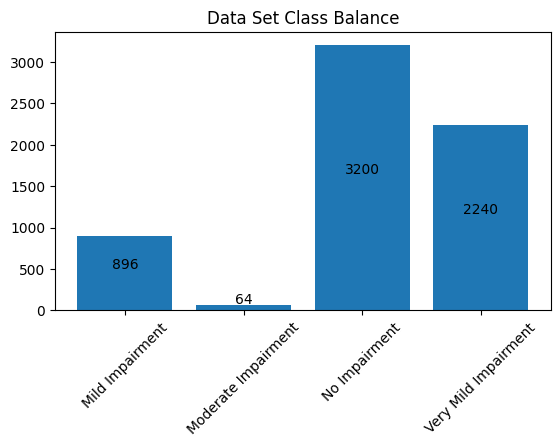

In [10]:
#Checking Class Balance 

bars = plt.bar(['Mild Impairment','Moderate Impairment','No Impairment','Very Mild Impairment'], sum(labels))
plt.xticks(rotation=45)
plt.title('Data Set Class Balance');
plt.gcf().subplots_adjust(bottom=0.3)
plt.bar_label(bars, label_type='center', padding=6)
plt.savefig('./figures/dataset_class_balance.png')

The overall dataset is fairly unbalanced, with the mild and moderate impairment groups having significantly fewer images when compared with the other two classifcations. The models will be trained on this base dataset as well as an augmented dataset in which the minority classes will be increased using oversampling or augmentation techniques to balance out the classes.

In [11]:
#Printing examples of labels
print(labels[[0,900,1200,6350]])

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


The data labels have been one hot encoded into 4 digits arrays representing the classes. These class codes are not intuitive so a helper function will be built out to quickly convert these class codes into the string representing diagnosis for readability.

In [12]:
#Class codes and their labels for reference while building function

# No Impairment
no_impairment_class_code = [0.0, 0.0, 1.0, 0.0]
# Very Mild Impairment
very_mild_class_code = [0.0, 0.0, 0.0, 1.0]
# Mild Impairment
mild_class_code = [1.0, 0.0, 0.0, 0.0]
# Moderate Impairment
moderate_class_code = [0.0, 1.0, 0.0, 0.0]


def class_code_to_label(class_code):
    '''
    Takes in a four digit array that represents the class of an image in the present AD MRI dataset and replaces it 
    with a string that represents the AD severity class name for readability.

    '''
    if class_code[2] == 1:
        return 'No Impairment'
    elif class_code[3] == 1:
        return 'Very Mild Impairment'
    elif class_code[0] == 1:
        return 'Mild Impairment'
    elif class_code[1] == 1:
        return 'Moderate Impairment'


The labels have been quickly examined, now a preview of the MRI images will be looked at for reference.

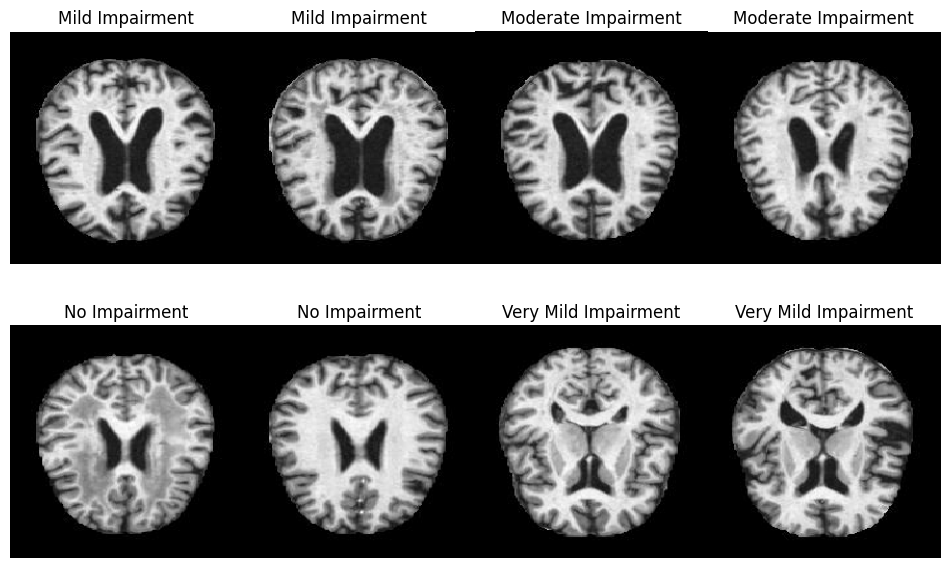

In [13]:
#List of 2 of each class for viewing sample
sample_image_indexes = [0,1,900,901,1200,1201,6349,6350]

#Plotting 8 Sample images
plt.figure(figsize=(12,7))
for num, index in enumerate(sample_image_indexes):
    plt.subplot(2,4,num+1)
    plt.gca().set_title(class_code_to_label(labels[index]))
    plt.axis('off')
    plt.subplots_adjust(wspace=0)
    plt.imshow(images[index])

# Exploratory Data Analysis

A deep dive into the data will allow for a greater overall understanding of the data and help provide clues for what steps will need to be taken to produce the best possible model.

The classes will be seperated in order to better understand the differences between them. An average image as well as histograms of oriented gradients for each classification will be created and then compared to the other classes in the hope of highlighting their differences.

In [14]:
#Creating Class based Datasets for class comparisons

#Creating Mild Dataset
mild_data = ImageDataGenerator(rescale=1./255).flow_from_directory(all_images_directory,
                                target_size = (224, 224),
                                batch_size = 896,
                                seed = 42, classes=['Mild Impairment'])
#Creating Moderate Dataset
moderate_data = ImageDataGenerator(rescale=1./255).flow_from_directory(all_images_directory,
                                target_size = (224, 224),
                                batch_size = 64,
                                seed = 42, classes=['Moderate Impairment'])
#Creating No Impairment Dataset
no_impair_data = ImageDataGenerator(rescale=1./255).flow_from_directory(all_images_directory,
                                target_size = (224, 224),
                                batch_size = 3200,
                                seed = 42, classes=['No Impairment'])
#Creating Very Mild Dataset
very_mild_data = ImageDataGenerator(rescale=1./255).flow_from_directory(all_images_directory,
                                target_size = (224, 224),
                                batch_size = 2240,
                                seed = 42, classes=['Very Mild Impairment'])



Found 896 images belonging to 1 classes.
Found 64 images belonging to 1 classes.
Found 3200 images belonging to 1 classes.
Found 2240 images belonging to 1 classes.


In [15]:
#Seperating images and labels
mild_images, mild_labels = next(mild_data)
moderate_images, moderate_labels = next(moderate_data)
no_impair_images, no_impair_labels = next(no_impair_data)
very_mild_images, very_mild_labels = next(very_mild_data)

## Creating Average Images of each Class

In order to elucidate key structural differences between the classes, the average image for each class will be computed. Each average image will then be compared with the other class in order to see the average structual differences between the different AD severity levels.

In [16]:
def create_average_image(images):
    '''
    Input a series of images or arrays that correspond to images and the average of all of those arrays are
    calculated. The output is two values, the average array and the average image of all inputs in a uint8 format
    '''
    #Turn each input image into an array
    images_arrays = np.array([np.array(im) for im in images])
    #Find the average of all of the arrays to create average image
    average_array = np.mean(images_arrays,axis=0)
    #Create image from average array and multiply by 255 for uint8 conversion
    ave_image = Image.fromarray((average_array*255).astype('uint8'))
    return average_array, ave_image

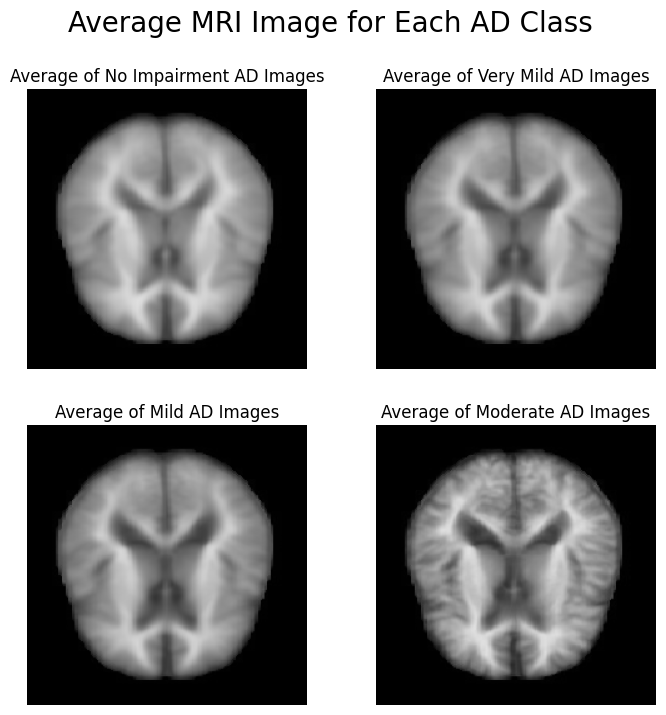

In [17]:
#Creating an Average image for each class
mild_mean_array, mild_mean_img = create_average_image(mild_images)
moderate_mean_array, moderate_mean_img = create_average_image(moderate_images)
no_impair_mean_array, no_impair_mean_img = create_average_image(no_impair_images)
very_mild_mean_array, very_mild_mean_img = create_average_image(very_mild_images)


#Visualizing all Average Images
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(9,8))
fig.suptitle('Average MRI Image for Each AD Class', size=20)
fig.subplots_adjust(wspace=0)

#Plotting No Impairment image
ax[0,0].imshow(no_impair_mean_array)
ax[0,0].set_title("Average of No Impairment AD Images")
ax[0,0].axis('off')

#Plotting Very Mild image
ax[0,1].imshow(very_mild_mean_array)
ax[0,1].set_title("Average of Very Mild AD Images")
ax[0,1].axis('off')

#Plotting Mild image
ax[1,0].imshow(mild_mean_array)
ax[1,0].set_title("Average of Mild AD Images")
ax[1,0].axis('off')

#Plotting Moderate image
ax[1,1].imshow(moderate_mean_array)
ax[1,1].set_title("Average of Moderate AD Images")
ax[1,1].axis('off')

plt.savefig('./figures/Class_Mean_Images.png')

Upon first glance it seem that atrophy increases as the severity of AD increases, this is evident in the loss of dense tissue as severity increases. The No impariment class has considerably smoother coloring when compared with more severe cases, most evident in the moderate AD image that has stronger gradients of color due to higher levels of tissue atrophy.  In order to better understand the differences the images will compared directly via their pixel denisty values.

## Comparing Average MRI Images

In order to better understand the differences between the average MRI images, the arrays corresponding to the images will be subtracted from one another to create an image that highlights the differences in pixel denisty between the choosen images.

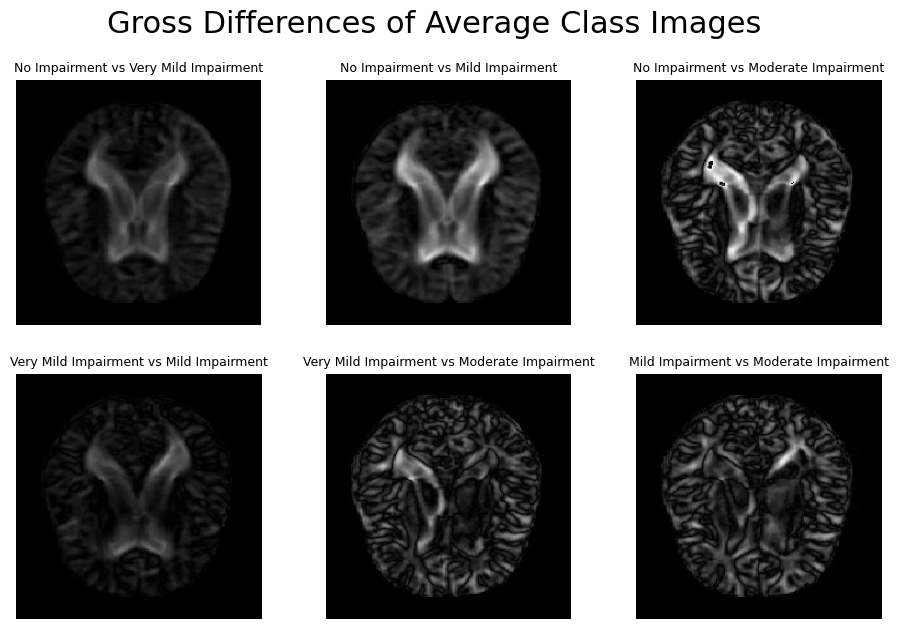

In [18]:
def compare_arrays(array1, array2):
    '''
    Input two different arrays that correspond to images, array2 will be subtracted from array1 
    and the absolute value will be taken to create a new array that represents the difference 
    between to images. The new array is then converted into uint8 form. 
    
    The output is an array equal to the absolute value of the difference of the input array multiplied by a constant
    to produce visualizations readable by the human eye.
    '''
    #Subtracting moderate mean image from no impairment image to find differences
    difference_of_arrays = abs(array1 - array2)
    #Multipling resulting image by 255 for uint8 conversion
    compared_array = (difference_of_arrays*900).astype(np.uint8)
    #plt.title(f"{array1} vs {array2}")
    return compared_array

#Creating dict for use in for loop
mean_arrays_dict = {'No Impairment': no_impair_mean_array, 
                    'Very Mild Impairment': very_mild_mean_array,
                    'Mild Impairment': mild_mean_array,
                    'Moderate Impairment':moderate_mean_array}
    
#Creating list of Mean image arrays to be looped through
mean_arrays_values =  list(mean_arrays_dict.values())
mean_arrays_keys = list(mean_arrays_dict.keys())



compared_arrays = []

plt.figure(figsize=(12,7))
plt.suptitle('Gross Differences of Average Class Images', size=22)

ax = 0 

for i in range(len(mean_arrays_dict)):
    for j in range(i + 1, len(mean_arrays_dict)):
            img = compare_arrays(mean_arrays_values[i], mean_arrays_values[j])
            plt.subplot(2,3,ax+1)
            plt.subplots_adjust(wspace=0)
            compared_arrays.append(img)
            #Create title in string format"
            plt.gca().set_title('{:s} vs {:s}'.format(mean_arrays_keys[i] ,mean_arrays_keys[j]), fontsize=9)
            plt.axis('off')
            plt.subplots_adjust(wspace=0)
            plt.imshow(img)
            ax+=1
        
plt.savefig('./figures/Class_Mean_Comparisons.png')

In the figure above, lighter spots represent a greater difference, while darker spots represent less difference between the images being compared. Examining the top row, which compares no impairment to the other groups, it is clear that as AD severity increases, the structure of the brain changes more and more from the no impairment or control group. This is evident in only a small amount of visible difference in the very mild group and increaseing amounts of white as the compared images AD severity increases.

It is important to note that the white color does not represent atrophy directly but simply differences between the color values in the images being compared. The trend within this figure is that structural changes are most drastic in more severe cases of AD when compared with the No Impairment group.

## Feature Description through Histograms of Oriented Gradients 

Histograms of Oriented Gradients (HOGs) are feature descriptors that focus on the structure of an image and extract information on edge magnitudes as well as edge orientation in order to extract the most important information in an image and remove unnecessary info. In other words, HOGs show at what rate the brightness of a pixel is changing and in what direction the change is occuring.


In [20]:
def create_hog(image_array):
    '''
    Input is an array that corresponds to an image. the array is then process through sci-kit image hog function
    and then its rescales the exposure of the image. 
    
    Output is the hog image as well as t
    '''
    fd, hog_image = hog(image_array, orientations=8, pixels_per_cell=(8, 8),
                    cells_per_block=(3, 3), visualize=True, channel_axis=2)
    h_image2 = exposure.rescale_intensity(hog_image, in_range=(0,.02))
    return h_image2 , fd


In [21]:
no_impair_hog, no_impair_hog_fd  = create_hog(no_impair_mean_array)
very_mild_hog, very_mild_hog_fd = create_hog(very_mild_mean_array)
mild_hog, mild_hog_fd = create_hog(mild_mean_array)
moderate_hog, moderate_hog_fd = create_hog(moderate_mean_array)

In [22]:
hog_list = [no_impair_hog, very_mild_hog, mild_hog, moderate_hog]

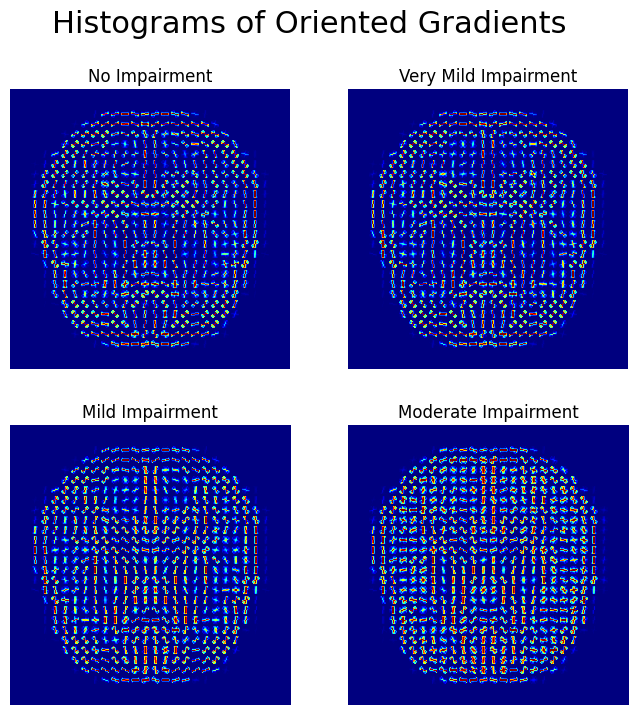

In [23]:
fig = plt.figure(figsize=(8,8) )
fig.suptitle("Histograms of Oriented Gradients", size=22)

hog_titles = ['No Impairment','Very Mild Impairment','Mild Impairment','Moderate Impairment']

for num, hog in enumerate(hog_list):
    fig.add_subplot(2,2,num+1)
    plt.title(hog_titles[num])
    plt.imshow(hog, cmap='jet')
    plt.axis('off')

plt.savefig('./figures/Class_Mean_HOGs.png')

It is somewhat subtle visibly, but it can clearly be seen that there are stronger color gradients and increased directionality as AD severity progresses, this is evident by the increase in overall size and directionality of the orientation lines as well as the increased amount of red and yellow color variety as severity increases (Warmer colors represent stronger gradients and cooler represent weaker). 

What this shows is that similar to what was seen when comparing. the base average MRI images, in that the more severe forms of AD have a much less smooth coloring to them with increased number of edges and stronger color gradients, this is likely due directly to loss of dense tissue and stronger atrophy in these more severe cases.

# Modeling

Before modeling can commence there are a few remaining steps that will need to be taken such as splitting the data set into a training, testing and validation group as well as building out a number of helper functions to assist with model evaluation.

In [65]:
#Model Evaluation Helper Functions

def visualize_model_performance(results):
    '''
    Input is the results after fitting a CNN Sequential model and the output are two graphs, one plots the loss by epoch
    for the training and validation datasets and the second plots a similar graph for accuracy rather than loss.
    '''
    history = results.history
    
    #final_epoch_stats(results)
    
    plt.figure(figsize=(10,4))
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Graph of Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    
    plt.figure(figsize=(10,4))
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.plot(history['val_recall'])
    plt.plot(history['recall'])
    plt.legend(['val_acc', 'acc', 'val_recall', 'recall'])
    plt.title('Graph of Model Accuracy and recall')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()



def make_confusion_and_classification(model, model_name):
    '''
    The Inputs for this fuction are a model prior to being fit and a string that will act as the title of the
    visualization. The output creates a heatmapped confusion matrix as well as a classification report for the model.
    The testing set (X_test, y_test) is used for these visualizations, so that the metrics are based on data that is
    novel to the model.
    '''
    
     #Make Predictions for model
    preds = model.predict(X_test)
    #Converting label predictions with argmax to show sentiment label
    preds = np.argmax(preds, axis=1)
    #Converting actual labels with argmax to match predictions
    y_test_arg= np.argmax(y_test, axis=1)
    #Creating Classification report
    class_repo = classification_report(y_test_arg ,preds, output_dict=True)
    
    #Show model.evaluate results 
    eval_metrics = model.evaluate(X_train, y_train, verbose=0)
    print('The Accuracy for the training group was', eval_metrics[1]*100)
    print('The Loss for the training group was', eval_metrics[0])
    print('--------------------------------------')
    eval_metrics = model.evaluate(X_test, y_test, verbose=0)
    print('The Accuracy for the test group was', eval_metrics[1]*100)
    print('The Loss for the test group was', eval_metrics[0])
    print('Recall of test group:',class_repo['macro avg']['recall'])
    
    #Create confusion matrix
    conmat = tf.math.confusion_matrix(y_test_arg, preds)
    #Create dataframe from confusion matrix
    val = np.mat(conmat)
    #classnames = list(set(y_train))
    df_cm = pd.DataFrame(val)
    
    #generate heatmap confusion matrix
    plt.figure()
    heatmap = sns.heatmap(df_cm, annot=True, cmap='Reds',fmt='g')
    heatmap.yaxis.set_ticklabels(classes, rotation=0)
    heatmap.xaxis.set_ticklabels(classes, rotation=40)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title(model_name)
    plt.show()
    
    #generate classification report
    print(classification_report(y_test_arg ,preds,))
    
def make_confusion_and_classification_vec(model, model_name):
    '''
    
    The same as above but set for the models with one-dimensional vectorized inputs.
    
    The Inputs for this fuction are a model prior to being fit and a string that will act as the title of the
    visualization. The output creates a heatmapped confusion matrix as well as a classification report for the model.
    The testing set (X_test, y_test) is used for these visualizations, so that the metrics are based on data that is
    novel to the model.
    '''
    
    #Make Predictions for model
    preds = model.predict(X_test_vec)
    #Converting label predictions with argmax to show sentiment label
    preds = np.argmax(preds, axis=1)
    #Converting actual labels with argmax to match predictions
    y_test_arg= np.argmax(y_test, axis=1)
    #Creating Classification report
    class_repo = classification_report(y_test_arg ,preds, output_dict=True)
    
    #Show model.evaluate results 
    eval_metrics = model.evaluate(X_train_vec, y_train, verbose=0)
    print('The Accuracy for the training group was', eval_metrics[1]*100)
    print('The Loss for the training group was', eval_metrics[0])
    print('--------------------------------------')
    eval_metrics = model.evaluate(X_test_vec, y_test, verbose=0)
    print('The Accuracy for the test group was', eval_metrics[1]*100)
    print('The Loss for the test group was', eval_metrics[0])
    print('Recall of test group:',class_repo['macro avg']['recall'])
    
    #Create confusion matrix
    conmat = tf.math.confusion_matrix(y_test_arg, preds)
    #Create dataframe from confusion matrix
    val = np.mat(conmat)
    #classnames = list(set(y_train))
    df_cm = pd.DataFrame(val)
    
    #generate heatmap confusion matrix
    plt.figure()
    heatmap = sns.heatmap(df_cm, annot=True, cmap='Reds',fmt='g')
    heatmap.yaxis.set_ticklabels(classes, rotation=0)
    heatmap.xaxis.set_ticklabels(classes, rotation=40)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title(model_name)
    plt.show()
    
    #generate classification report
    print(classification_report(y_test_arg ,preds,))

## Train-Test Split


The entire dataset will be split into three groups, a training, testing and a validation group at a ratio of 7 : 1.5 : 1.5. The training and validation sets will be used to train and validate the model. The testing set will be kept completely out of the traing process and will be used a novel dataset on which the trained model will be tested for its overall performance.

In [28]:
#Redefining data and labels for modeling
X = images
y = labels

#Splitting data set into train, test and validation sets at a ratio of 7:1.5:1.5
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

X_test, X_val, y_test, y_val = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)


In [29]:
#Converting training labels to Dataframe in which each column is a class marker to view class balance
y_train_df = pd.DataFrame(y_train, columns=classes)
y_train_df.sum(axis=0) 

Mild Impairment          627.0
Moderate Impairment       45.0
No Impairment           2240.0
Very Mild Impairment    1568.0
dtype: float32

In [30]:
y_test_df = pd.DataFrame(y_test, columns=classes)
y_test_df.sum(axis=0) 

Mild Impairment         145.0
Moderate Impairment      12.0
No Impairment           466.0
Very Mild Impairment    337.0
dtype: float32

The classes are not perfectly balanced throughout the training dataset, a model will be trained on this original dataset, as well as a dataset that had been augmented to help reduce the class imbalance.

In [31]:
#Investigating shape of data prior to reshaping into vector
print('X_train Shape:', X_train.shape)
print('y_train Shape:', y_train.shape)
print('-----------------------------')
print('X_val Shape:', X_val.shape)
print('y_val Shape:', y_val.shape)
print('-----------------------------')
print('X_test Shape:', X_test.shape)
print('y_test Shape:', y_test.shape)
print('-----------------------------')
print('X_rem Shape:', X_rem.shape)
print('y_rem Shape:', y_rem.shape)

X_train Shape: (4480, 224, 224, 3)
y_train Shape: (4480, 4)
-----------------------------
X_val Shape: (960, 224, 224, 3)
y_val Shape: (960, 4)
-----------------------------
X_test Shape: (960, 224, 224, 3)
y_test Shape: (960, 4)
-----------------------------
X_rem Shape: (1920, 224, 224, 3)
y_rem Shape: (1920, 4)


The MLP classification model that will be built out takes vectors as inputs, so each image will have to be concatenated into a single 150528-dimensional vector due to the original image shape being 224\*224\*3. All of the images in this data set are the same size and therefore will be concatenated in the same way so pixel positional information will remain intact after reshaping.

In [32]:
#Reshaping images into vectors
X_train_vec = X_train.reshape(4480, 150528)
X_val_vec = X_val.reshape(960, 150528)
X_test_vec = X_test.reshape(960, 150528)
X_rem_vec = X_rem.reshape(1920, 150528)

print('X_train Shape:', X_train.shape)
print('y_train Shape:', y_train.shape)
print('-----------------------------')
print('X_val Shape:', X_val.shape)
print('y_val Shape:', y_val.shape)
print('-----------------------------')
print('X_test Shape:', X_test.shape)
print('y_test Shape:', y_test.shape)
print('-----------------------------')
print('X_rem Shape:', X_rem.shape)
print('y_rem Shape:', y_rem.shape)

X_train Shape: (4480, 224, 224, 3)
y_train Shape: (4480, 4)
-----------------------------
X_val Shape: (960, 224, 224, 3)
y_val Shape: (960, 4)
-----------------------------
X_test Shape: (960, 224, 224, 3)
y_test Shape: (960, 4)
-----------------------------
X_rem Shape: (1920, 224, 224, 3)
y_rem Shape: (1920, 4)


# K Nearest Neighbors Classification 

In [16]:
knn_baseline = KNeighborsClassifier(n_jobs=-1)
knn_baseline.fit(X_train_vec, y_train_vec)

KNeighborsClassifier(n_jobs=-1)

In [17]:
print('Training score:', knn_baseline.score(X_train_vec, y_train_vec) * 100)
print('Test Score:', knn_baseline.score(X_rem_vec, y_rem_vec) * 100)

print(classification_report(y_rem_vec, knn_baseline.predict(X_rem_vec), target_names=classes))

Training score: 98.63839285714285
Test Score: 95.67708333333333
                      precision    recall  f1-score   support

     Mild Impairment       0.99      0.90      0.95       269
 Moderate Impairment       0.94      0.84      0.89        19
       No Impairment       0.97      0.98      0.97       960
Very Mild Impairment       0.98      0.95      0.96       672

           micro avg       0.97      0.96      0.97      1920
           macro avg       0.97      0.92      0.94      1920
        weighted avg       0.97      0.96      0.96      1920
         samples avg       0.96      0.96      0.96      1920



/Users/lucasf/miniconda/envs/learn-env2/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Baseline Base Sequential CNN Model

Using an iterative modeling approach a CNN model will be trained on the base dataset, and improved until satisfactory results are acquired. This series of models will be referred to as "base models" as they use the base dataset and an augmented dataset will be created and used to train another set of models that will be referred to "augmented models" later on in this notebook.

A fairly simple baseline Sequential CNN is built to start consisting of three dense layers and compiled utalizing the Adam optimizer for and categorical_crossentropy for loss. an Early stop will also be built in based on validation accuracy to make sure computational resources are being used effectively. The epoch with the best validaiton accuracy will also be saved as an .h5 file for to the present directory for future use.

In [50]:
baseline_model = Sequential()

baseline_model.add(layers.Dense(128, activation='relu', input_shape=(150528,)))
baseline_model.add(layers.Dense(64, activation='relu'))
baseline_model.add(layers.Dense(4, activation='softmax'))

baseline_model.compile(optimizer='adam',metrics=['accuracy',Recall()], loss='categorical_crossentropy')
baseline_model.summary()

#Creating Early stop based on when validation accuracy stops increasing and saving best model
early_stop = [EarlyStopping(monitor = 'val_accuracy', patience = 15, mode='max'),
              ModelCheckpoint(filepath='best models/cnn_best_model.h5', monitor='val_accuracy', save_best_only=True)]


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               19267712  
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
Total params: 19276228 (73.53 MB)
Trainable params: 19276228 (73.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
baseline_results = baseline_model.fit(X_train_vec, y_train, epochs=30, batch_size=50,
                                  validation_data=(X_val_vec, y_val), verbose=1, callbacks=early_stop)


Epoch 1/30
90/90 [==============================] - ETA: 0s - loss: 7.2544 - accuracy: 0.4629 - recall: 0.4491

/Users/lucasf/miniconda/envs/learn-env2/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


90/90 [==============================] - 6s 57ms/step - loss: 7.2544 - accuracy: 0.4629 - recall: 0.4491 - val_loss: 7.0139 - val_accuracy: 0.3490 - val_recall: 0.3490
Epoch 2/30
90/90 [==============================] - 4s 45ms/step - loss: 1.9556 - accuracy: 0.5375 - recall: 0.5163 - val_loss: 1.3807 - val_accuracy: 0.5813 - val_recall: 0.5792
Epoch 3/30
90/90 [==============================] - 4s 49ms/step - loss: 1.3136 - accuracy: 0.5750 - recall: 0.5460 - val_loss: 0.6692 - val_accuracy: 0.7208 - val_recall: 0.6333
Epoch 4/30
90/90 [==============================] - 4s 49ms/step - loss: 0.9766 - accuracy: 0.6049 - recall: 0.5732 - val_loss: 0.8617 - val_accuracy: 0.6073 - val_recall: 0.5510
Epoch 5/30
90/90 [==============================] - 5s 53ms/step - loss: 0.7677 - accuracy: 0.6772 - recall: 0.6402 - val_loss: 0.7194 - val_accuracy: 0.6812 - val_recall: 0.6281
Epoch 6/30
90/90 [==============================] - 4s 40ms/step - loss: 0.6764 - accuracy: 0.7170 - recall: 0.6748 

30/30 [==============================] - 0s 9ms/step
The Accuracy for the training group was 91.07142686843872
The Loss for the training group was 0.22497932612895966
--------------------------------------
The Accuracy for the test group was 81.66666626930237
The Loss for the test group was 0.4357849359512329
Recall of test group: 0.7402833684436421


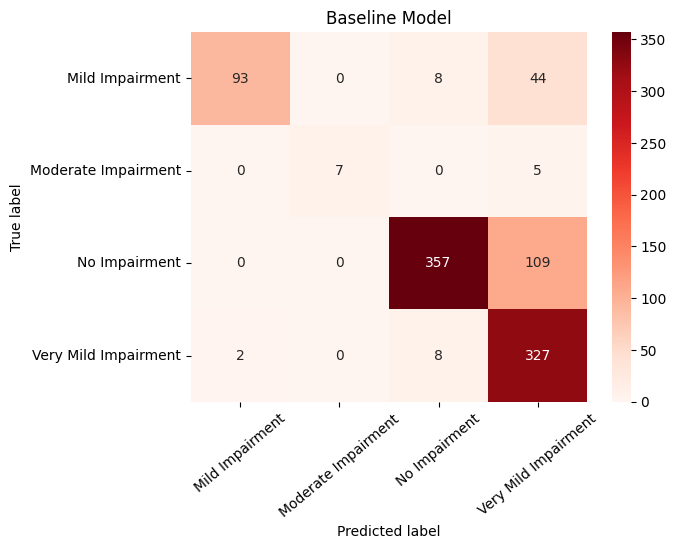

              precision    recall  f1-score   support

           0       0.98      0.64      0.77       145
           1       1.00      0.58      0.74        12
           2       0.96      0.77      0.85       466
           3       0.67      0.97      0.80       337

    accuracy                           0.82       960
   macro avg       0.90      0.74      0.79       960
weighted avg       0.86      0.82      0.82       960



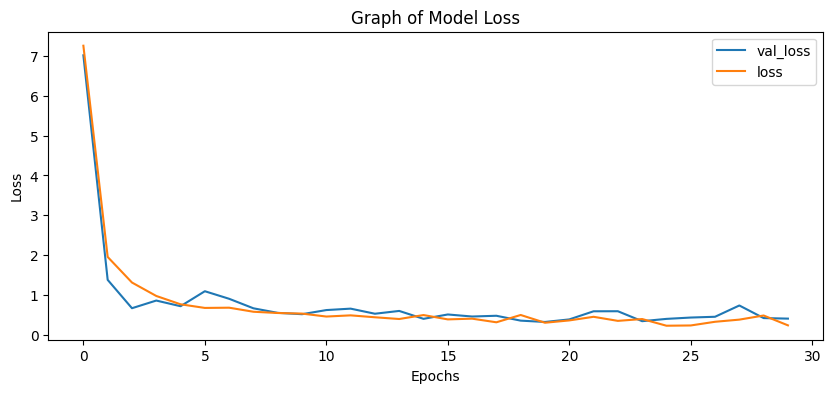

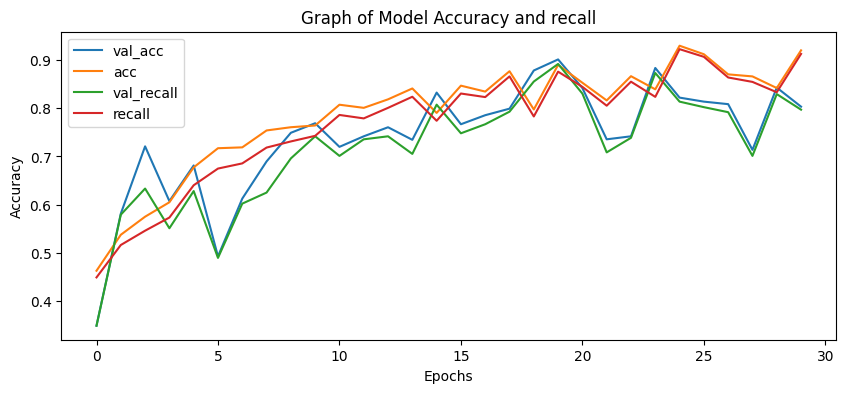

In [63]:
make_confusion_and_classification_vec(baseline_model, 'Baseline Model')
visualize_model_performance(baseline_results)

### Baseline CNN Model Analysis

The Baseline CNN model trained on the base dataset without augmented images performed very well with an overall training accuracy of ~95% and a testing accuracy of ~88%. This model is currently overfit to the training data, in an attempt to mend this issue a dropout layer will be added as well as the learning rate will be adjusted.


### Base CNN Model_1 - Additional Dropout Layer


In [65]:
model_1 = Sequential()

model_1.add(layers.Dense(128, activation='relu', input_shape=(150528,)))
model_1.add(layers.Dense(64, activation='relu'))
model_1.add(layers.Dropout(0.2))
model_1.add(layers.Dense(4, activation='softmax'))

opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.01)

model_1.compile(optimizer='adam',metrics=['accuracy'], loss='categorical_crossentropy')
model_1.summary()

model_1_results = model_1.fit(X_train_vec, y_train, epochs=100, batch_size=50,
                                  validation_data=(X_val_vec, y_val), verbose=1, callbacks=early_stop)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               19267712  
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 4)                 260       
                                                                 
Total params: 19276228 (73.53 MB)
Trainable params: 19276228 (73.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
90/90 [==============================] - 5s 49ms/step - loss: 4.9971 - accuracy: 0.4366 - val_loss: 1.1140 - val_accuracy: 0.5219
Ep

90/90 [==============================] - 4s 43ms/step - loss: 0.7422 - accuracy: 0.6446 - val_loss: 0.7824 - val_accuracy: 0.6208
Epoch 52/100
90/90 [==============================] - 4s 44ms/step - loss: 0.7890 - accuracy: 0.6290 - val_loss: 0.6419 - val_accuracy: 0.7354
Epoch 53/100
90/90 [==============================] - 4s 41ms/step - loss: 0.8433 - accuracy: 0.5953 - val_loss: 0.7703 - val_accuracy: 0.6385
Epoch 54/100
90/90 [==============================] - 4s 42ms/step - loss: 0.8013 - accuracy: 0.6187 - val_loss: 0.6389 - val_accuracy: 0.7156
Epoch 55/100
90/90 [==============================] - 4s 42ms/step - loss: 0.7449 - accuracy: 0.6442 - val_loss: 0.7023 - val_accuracy: 0.7104
Epoch 56/100
90/90 [==============================] - 4s 42ms/step - loss: 0.7281 - accuracy: 0.6585 - val_loss: 0.6279 - val_accuracy: 0.7375
Epoch 57/100
90/90 [==============================] - 4s 42ms/step - loss: 0.7621 - accuracy: 0.6464 - val_loss: 0.9255 - val_accuracy: 0.5615
Epoch 58/100

The Accuracy for the training group was 50.0
The Loss for the training group was 1.036559820175171
--------------------------------------
The Accuracy for the test group was 48.54166805744171
The Loss for the test group was 1.0588124990463257
30/30 [==============================] - 0s 7ms/step


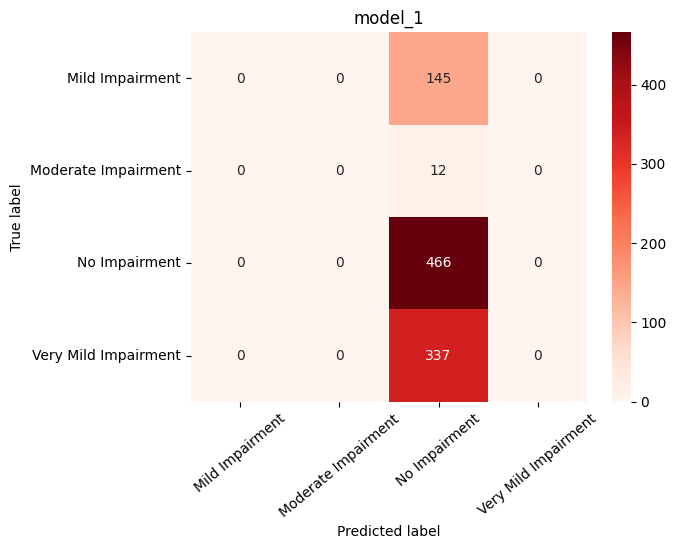

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       145
           1       0.00      0.00      0.00        12
           2       0.49      1.00      0.65       466
           3       0.00      0.00      0.00       337

    accuracy                           0.49       960
   macro avg       0.12      0.25      0.16       960
weighted avg       0.24      0.49      0.32       960



/Users/lucasf/miniconda/envs/learn-env2/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lucasf/miniconda/envs/learn-env2/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lucasf/miniconda/envs/learn-env2/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

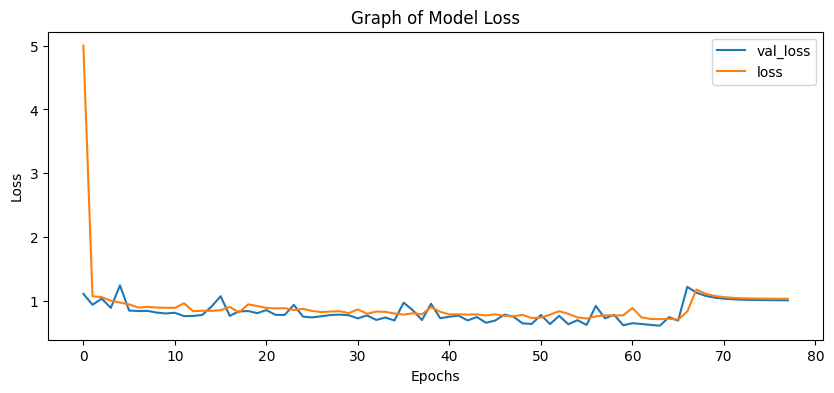

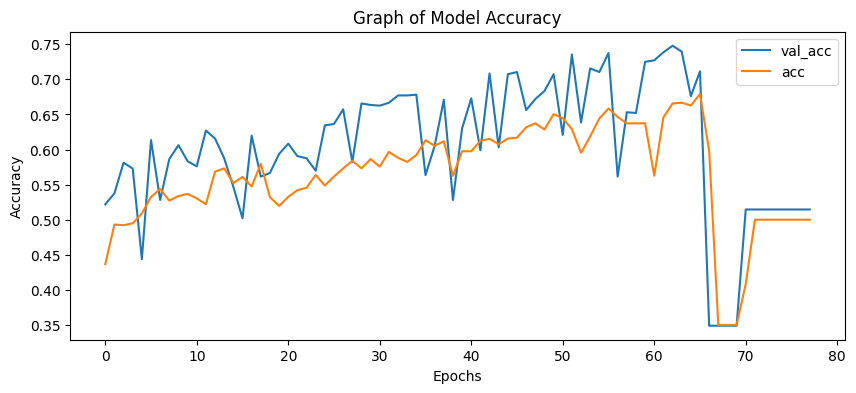

In [66]:
make_confusion_and_classification(model_1, 'model_1')
visualize_model_performance(model_1_results)

### Base CNN Model_1 Analysis

This iteration of the model has been cleary overtrained to the majority "No Impairment" class as all of its predictions landed in this classification. To mend this issue the learning rate will be reduced from 0.01 to 0.001 and retrained. A Batch Normalization layer will also be added as the intial layer in order to avoid the issues in the present model.


### Base CNN Model_2 - Batch Normalization and Additional Dropout Layer


In [35]:
model_2 = Sequential()

model_2.add(layers.BatchNormalization(input_shape=(150528,)))
model_2.add(layers.Dense(128, activation='relu'))
model_2.add(layers.Dense(64, activation='relu'))
model_2.add(layers.Dropout(0.2))
model_2.add(layers.Dense(4, activation='softmax'))

opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)

model_2.compile(optimizer=opt,metrics=['accuracy'], loss='categorical_crossentropy')
model_2.summary()

model_2_results = model_2.fit(X_train_vec, y_train, epochs=100, batch_size=50,
                                  validation_data=(X_val_vec, y_val), verbose=1, callbacks=early_stop)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_5 (Bat  (None, 150528)            602112    
 chNormalization)                                                
                                                                 
 dense_9 (Dense)             (None, 128)               19267712  
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 4)                 260       
                                                                 
Total params: 19878340 (75.83 MB)
Trainable params: 19577284 (74.68 MB)
Non-trainable params: 301056 (1.15 MB)
_________

The Accuracy for the training group was 99.46428537368774
The Loss for the training group was 0.021027972921729088
--------------------------------------
The Accuracy for the test group was 96.97916507720947
The Loss for the test group was 0.1082468256354332
30/30 [==============================] - 0s 11ms/step


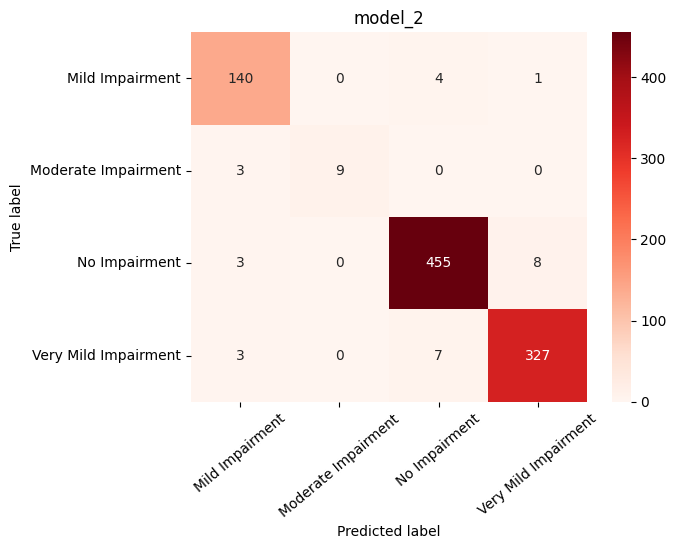

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       145
           1       1.00      0.75      0.86        12
           2       0.98      0.98      0.98       466
           3       0.97      0.97      0.97       337

    accuracy                           0.97       960
   macro avg       0.97      0.92      0.94       960
weighted avg       0.97      0.97      0.97       960



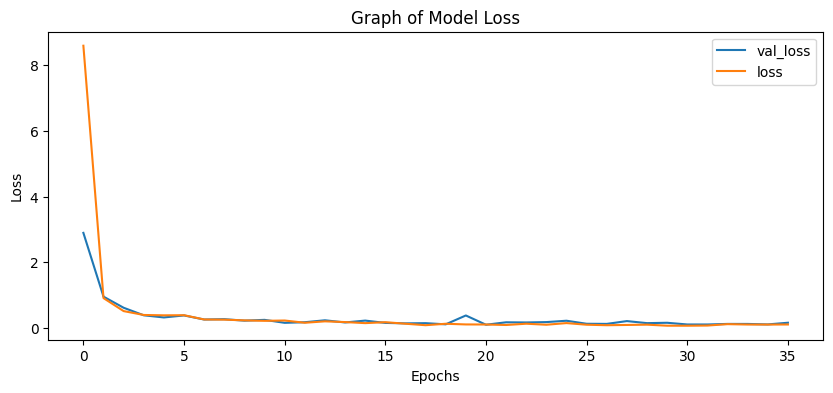

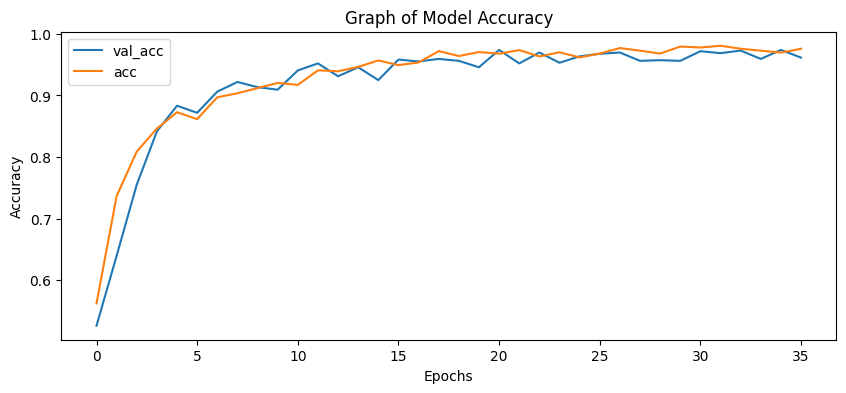

In [36]:
make_confusion_and_classification(model_2, 'model_2')
visualize_model_performance(model_2_results)

### Base CNN Model_2 Analysis

Reducing the Learning rate by a factor of ten seems to have mitigated the overarching majority classification problem of the previous iteration, this is evident in the significantly better accuracy and loss metrics for both the training and testing groups. 

This model is still slightly overfit with the ots performance on the training group being higher than the testing group, an additional dropout layer will be added after the input layer in order to mend this.

### Base CNN Model_3 - Additional Dropout Layer

In [30]:
model_3 = Sequential()

model_3.add(layers.BatchNormalization(input_shape=(150528,)))
model_3.add(layers.Dropout(0.4))
model_3.add(layers.Dense(128, activation='relu'))
model_3.add(layers.Dense(64, activation='relu'))
model_3.add(layers.Dropout(0.2))
model_3.add(layers.Dense(4, activation='softmax'))

opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)

model_3.compile(optimizer=opt,metrics=['accuracy'], loss='categorical_crossentropy')
model_3.summary()

model_3_results = model_3.fit(X_train_vec, y_train, epochs=100, batch_size=50,
                                  validation_data=(X_val_vec, y_val), verbose=1, callbacks=early_stop)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_2 (Bat  (None, 150528)            602112    
 chNormalization)                                                
                                                                 
 dropout_2 (Dropout)         (None, 150528)            0         
                                                                 
 dense_3 (Dense)             (None, 128)               19267712  
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 4)                 260       
                                                      

/Users/lucasf/miniconda/envs/learn-env2/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


90/90 [==============================] - 8s 85ms/step - loss: 0.8020 - accuracy: 0.7266 - val_loss: 1.2224 - val_accuracy: 0.6062
Epoch 3/100
90/90 [==============================] - 8s 84ms/step - loss: 0.5521 - accuracy: 0.7877 - val_loss: 0.7835 - val_accuracy: 0.7125
Epoch 4/100
90/90 [==============================] - 8s 90ms/step - loss: 0.4414 - accuracy: 0.8208 - val_loss: 0.4327 - val_accuracy: 0.8333
Epoch 5/100
90/90 [==============================] - 8s 85ms/step - loss: 0.3598 - accuracy: 0.8540 - val_loss: 0.2786 - val_accuracy: 0.8958
Epoch 6/100
90/90 [==============================] - 7s 79ms/step - loss: 0.2996 - accuracy: 0.8828 - val_loss: 0.3187 - val_accuracy: 0.8792
Epoch 7/100
90/90 [==============================] - 7s 83ms/step - loss: 0.2734 - accuracy: 0.9007 - val_loss: 0.2778 - val_accuracy: 0.9062
Epoch 8/100
90/90 [==============================] - 8s 90ms/step - loss: 0.1986 - accuracy: 0.9257 - val_loss: 0.1818 - val_accuracy: 0.9354
Epoch 9/100
90/90 

The Accuracy for the training group was 99.62053298950195
The Loss for the training group was 0.018874945119023323
--------------------------------------
The Accuracy for the test group was 97.50000238418579
The Loss for the test group was 0.10984204709529877
30/30 [==============================] - 0s 9ms/step


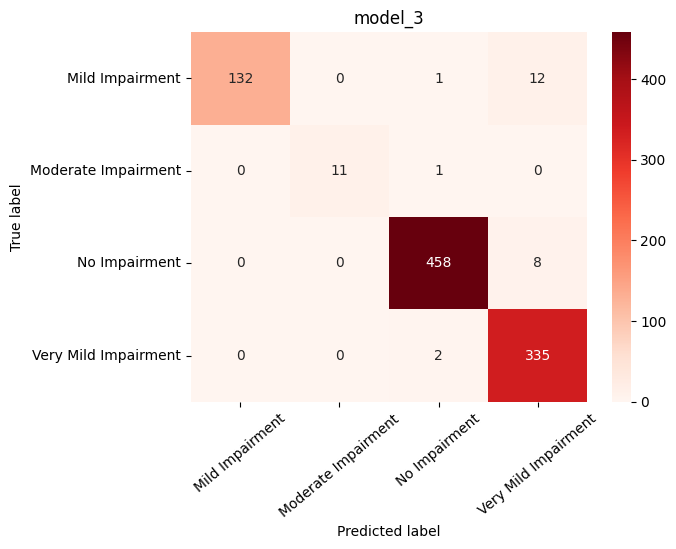

              precision    recall  f1-score   support

           0       1.00      0.91      0.95       145
           1       1.00      0.92      0.96        12
           2       0.99      0.98      0.99       466
           3       0.94      0.99      0.97       337

    accuracy                           0.97       960
   macro avg       0.98      0.95      0.97       960
weighted avg       0.98      0.97      0.97       960



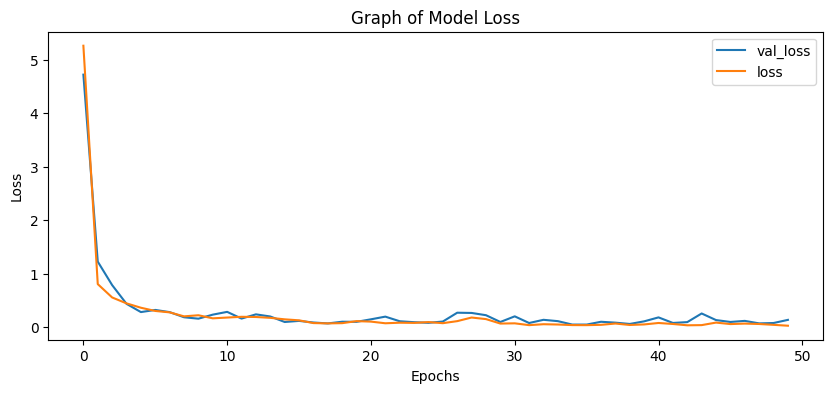

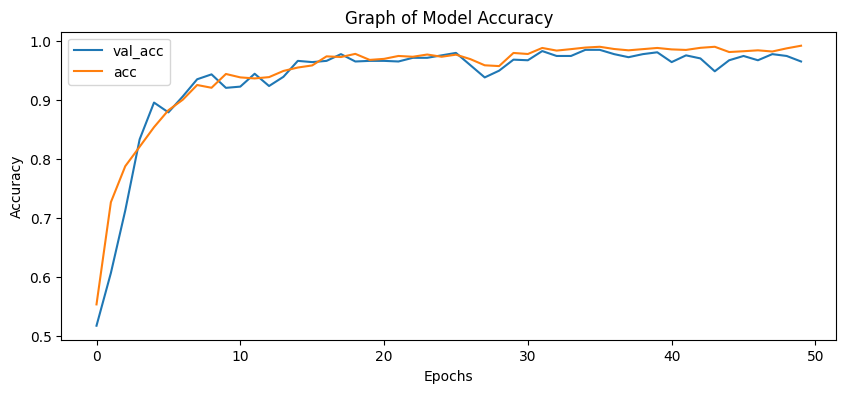

In [31]:
make_confusion_and_classification(model_3, 'model_3')
visualize_model_performance(model_3_results)

### Base CNN Model_3 Analysis

The additional dropout layer has improve the model's performance on the test group by about half a percent from ~97% to ~97.5%. Another batch normalization layer after the first dense layer will be added in an attempt to increase the performance on the test set further.

### Base CNN Model_4 - Additional BatchNormalization

In [32]:
model_4 = Sequential()

model_4.add(layers.BatchNormalization(input_shape=(150528,)))
model_4.add(layers.Dropout(0.5))
model_4.add(layers.Dense(128, activation='relu'))
model_4.add(layers.BatchNormalization())
model_4.add(layers.Dropout(0.2))
model_4.add(layers.Dense(64, activation='relu'))
model_4.add(layers.Dense(4, activation='softmax'))

opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)

model_4.compile(optimizer=opt,metrics=['accuracy'], loss='categorical_crossentropy')
model_4.summary()

model_4_results = model_4.fit(X_train_vec, y_train, epochs=100, batch_size=50,
                                  validation_data=(X_val_vec, y_val), verbose=1, callbacks=early_stop)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 150528)            602112    
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 150528)            0         
                                                                 
 dense_3 (Dense)             (None, 128)               19267712  
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)               

The Accuracy for the training group was 99.97767806053162
The Loss for the training group was 0.0011671576648950577
--------------------------------------
The Accuracy for the test group was 98.95833134651184
The Loss for the test group was 0.04387601464986801
30/30 [==============================] - 0s 11ms/step


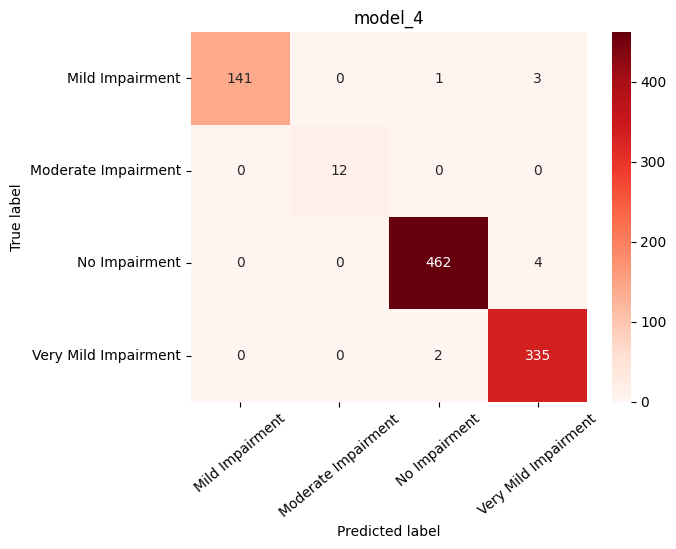

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       145
           1       1.00      1.00      1.00        12
           2       0.99      0.99      0.99       466
           3       0.98      0.99      0.99       337

    accuracy                           0.99       960
   macro avg       0.99      0.99      0.99       960
weighted avg       0.99      0.99      0.99       960



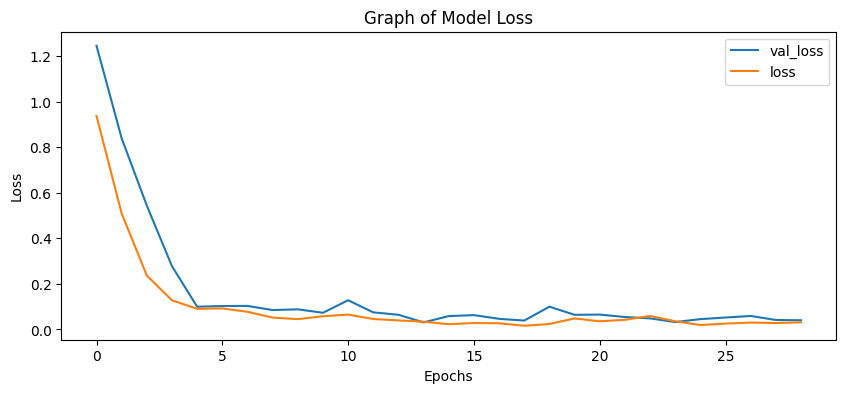

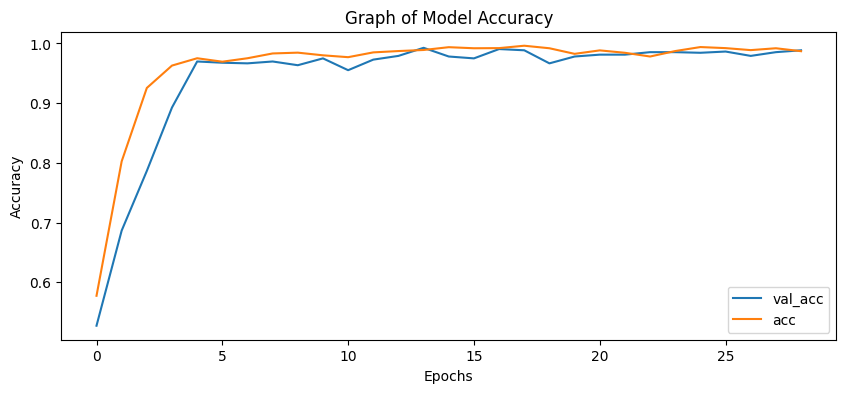

In [33]:
make_confusion_and_classification(model_4, 'model_4')
visualize_model_performance(model_4_results)

### Base CNN Model_4 Analysis

Model_4 is the best performing model so far, it is less overfit at accuracies of 100% and ~98% for the training and test sets and low loss metrics at .001 and .005 respectively. Based on the graphs for loss and accuaracy this model's final epoch is not its best performing epoch. The model was programmed to save the best performing epoch as a seperate .h5 file, therefore the best epoch of the best performing model will be loaded and used as the final model.



## Final Base CNN Model

The epoch with the highest validation accuracy from model_4 will be loaded as used as the final model for the base dataset. This final model will be ran on the testing group in order to understand how it would run on a hypothetically novel dataset.



The Accuracy for the training group was 99.97767806053162
The Loss for the training group was 0.003473592922091484
--------------------------------------
The Accuracy for the test group was 98.85416626930237
The Loss for the test group was 0.031671516597270966
30/30 [==============================] - 0s 10ms/step
Recall of Test group: 0.9863566917525688


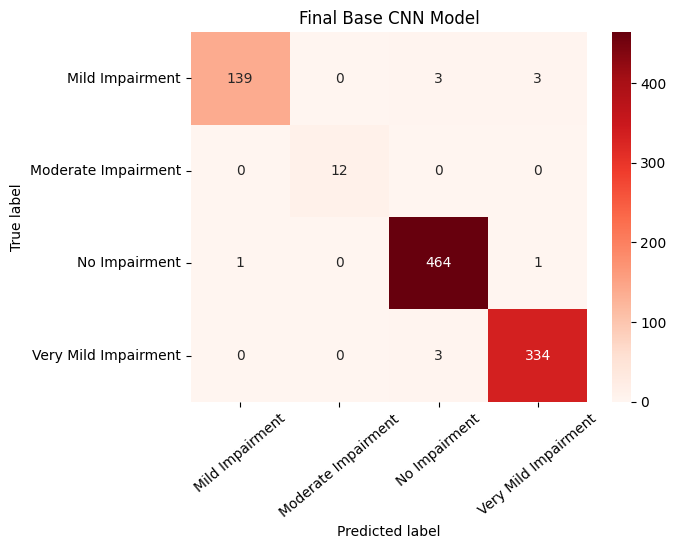

{'0': {'precision': 0.9928571428571429, 'recall': 0.9586206896551724, 'f1-score': 0.9754385964912282, 'support': 145}, '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 12}, '2': {'precision': 0.9872340425531915, 'recall': 0.9957081545064378, 'f1-score': 0.9914529914529914, 'support': 466}, '3': {'precision': 0.9881656804733728, 'recall': 0.9910979228486647, 'f1-score': 0.9896296296296296, 'support': 337}, 'accuracy': 0.9885416666666667, 'macro avg': {'precision': 0.9920642164709268, 'recall': 0.9863566917525688, 'f1-score': 0.9891303043934623, 'support': 960}, 'weighted avg': {'precision': 0.9885699831912496, 'recall': 0.9885416666666667, 'f1-score': 0.9885009121807367, 'support': 960}}


In [48]:
#Loading Best epoch of Model_4 as final model
final_cnn_model = load_model('best models/cnn_best_model.h5')
make_confusion_and_classification_vec(final_cnn_model, 'Final Base CNN Model')

## Final Base CNN Model Analysis

The final model performs exceptionally well on the test group with an overall accuracy of ~99% with a loss metric of ~0.036. At this point the most obvious issues remaining with this model is that the minority classes, "Moderate Impairment" and "Mild Impairment", had a much lower sample size overall within the dataset set with these classes only containing 12 and 145 images at these respective classification levels. 

In order to attempt to mend this imbalance, an augmented dataset will be produced that includes synthetic MRI images built by implemnting  oversampling techniques onto the minority classes. The results of the augemented dataset and base dataset will then be compared on performance.



# Creating Augmented MRIs to Balance classes

As previously stated, the 4 classes are not well balanced in the original dataset. In an attempt to mend this imbalance, augmented images will be created from the minority classes in order to increase the sample size of these classes.

These augmentated images will only be used in the training group and the testing group will be left the same as with the prevvios model. In other words, only real MRI images will be in the test group to see how the augmented images as part of the model's training effect classification performance on real MRI images.

In [46]:
#Image Generator to Create Augmented Images
imgen = ImageDataGenerator(
        zoom_range=0.15,
        shear_range=0.15,
        width_shift_range=(.03),
        height_shift_range=(.03),
        fill_mode="nearest"
        )

#Creating augmented images for mild and moderate impairment
mild_aug_flow = imgen.flow(mild_images, mild_labels, batch_size=512)
moderate_aug_flow = imgen.flow(moderate_images, moderate_labels, batch_size=500)


In [47]:
mild_aug_images, mild_aug_labels = next(mild_aug_flow)
moderate_aug_images, moderate_aug_labels = next(moderate_aug_flow)

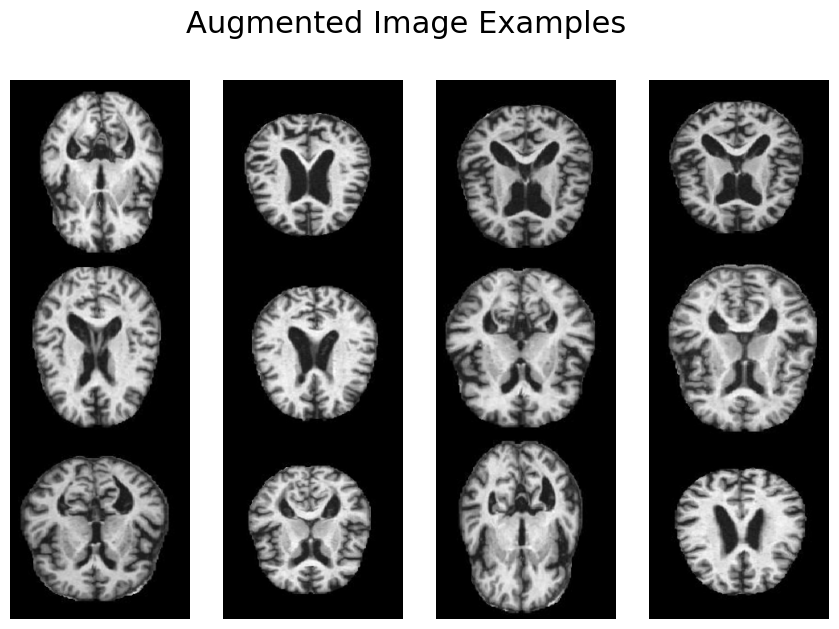

In [48]:
#Combining mild and moderate images together
mild_and_mod_aug_images = np.vstack((mild_aug_images, moderate_aug_images))

#Generate random numbers to use as indexes for sample images
mild_aug_sample_img_indexes = random.sample(range(0, 64), 12)

#Plotting 12 Sample images, 6 from mild impairment aug group and 6 from moderate impairment aug group
plt.figure(figsize=(11,7))
plt.suptitle('Augmented Image Examples', size=22)
count = 0
for num, index in enumerate(mild_aug_sample_img_indexes):
    if count >= 6:
        plt.subplot(3,4,num+1)
        plt.axis('off')
        plt.subplots_adjust(wspace=0, hspace=0)
        plt.imshow(mild_aug_images[index])
        count += 1
    if count < 6:
        plt.subplot(3,4,num+1)
        plt.axis('off')
        plt.subplots_adjust(wspace=0, hspace=0)
        plt.imshow(moderate_aug_images[index])
        count += 1

Now the augmented images are all created but the next issue is that the labels are in the wrong format, as the labels are in a 1d array while they need to be in a 4d array that is equivalent to their AD class code. This will be solved by created an

In [50]:
# Mild Impairment
mild_class_code = [1.0, 0.0, 0.0, 0.0]
# Moderate Impairment
moderate_class_code = [0.0, 1.0, 0.0, 0.0]

# Creating 64 Moderate class code labels to pair with 64 augmented moderate images
for num in range(0,6):
    moderate_class_code = np.vstack((moderate_class_code, moderate_class_code))

# Creating 512 Mild class code labels to pair with 512 augmented mild images
for num in range(0,9):
    mild_class_code = np.vstack((mild_class_code, mild_class_code))
    
    
moderate_aug_labels = moderate_class_code
mild_aug_labels = mild_class_code

print('Moderate Augmented Images shape:', moderate_aug_images.shape)
print('Moderate Augmented Labels shape:', moderate_aug_labels.shape)
''
print('Mild Augmented images shape:', mild_aug_images.shape)
print('Mild Augmented Labels shape:', mild_aug_labels.shape)

Moderate Augmented Images shape: (64, 224, 224, 3)
Moderate Augmented Labels shape: (64, 4)
Mild Augmented images shape: (512, 224, 224, 3)
Mild Augmented Labels shape: (512, 4)


In [51]:
#Reshaping augmenting images into vectors
moderate_aug_images = moderate_aug_images.reshape(64, 150528)
mild_aug_images = mild_aug_images.reshape(512, 150528)

#Added Augmented images and labels to training groups
X_train_aug_vec = np.vstack((X_train_vec, mild_aug_images, moderate_aug_images))
y_train_aug_vec = np.vstack((y_train_vec, mild_aug_labels, moderate_aug_labels))


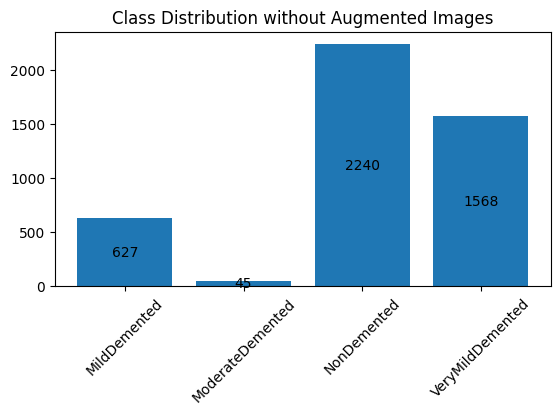

In [52]:
train_bars = plt.bar(['MildDemented','ModerateDemented','NonDemented','VeryMildDemented'], sum(y_train_vec))
plt.xticks(rotation=45)
plt.bar_label(train_bars, label_type='center')
plt.title('Class Distribution without Augmented Images')
plt.gcf().subplots_adjust(bottom=0.35)

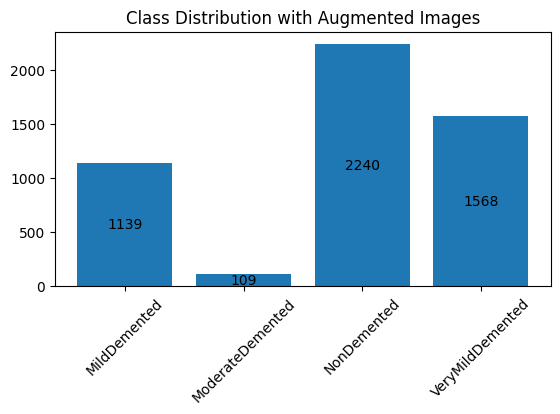

In [53]:
aug_bars = plt.bar(['MildDemented','ModerateDemented','NonDemented','VeryMildDemented'], sum(y_train_aug_vec))
plt.xticks(rotation=45)
plt.bar_label(aug_bars, label_type='center')
plt.title('Class Distribution with Augmented Images')
plt.gcf().subplots_adjust(bottom=0.35)

In [56]:
baseline_cnn_aug = Sequential()

baseline_cnn_aug.add(layers.BatchNormalization(input_shape=(150528,)))
baseline_cnn_aug.add(layers.Dropout(0.4))
baseline_cnn_aug.add(layers.Dense(128, activation='relu'))
baseline_cnn_aug.add(layers.Dense(64, activation='relu'))
baseline_cnn_aug.add(layers.Dropout(0.2))
baseline_cnn_aug.add(layers.Dense(4, activation='softmax'))

opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)

baseline_cnn_aug.compile(optimizer=opt,metrics=['accuracy'], loss='categorical_crossentropy')
baseline_cnn_aug.summary()

early_stop_aug = [EarlyStopping(monitor = 'val_accuracy', patience = 15, mode='max'),
              ModelCheckpoint(filepath='best models/cnn_aug_best_model.h5', monitor='val_accuracy', save_best_only=True)]


baseline_cnn_aug_results = baseline_cnn_aug.fit(X_train_aug_vec, y_train_aug_vec, epochs=100, batch_size=50,
                                  validation_data=(X_val_vec, y_val_vec), verbose=1, callbacks=early_stop_aug)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_2 (Bat  (None, 150528)            602112    
 chNormalization)                                                
                                                                 
 dropout_4 (Dropout)         (None, 150528)            0         
                                                                 
 dense_6 (Dense)             (None, 128)               19267712  
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 4)                 260       
                                                      

102/102 [==============================] - 8s 78ms/step - loss: 0.0507 - accuracy: 0.9834 - val_loss: 0.0684 - val_accuracy: 0.9802
Epoch 49/100
102/102 [==============================] - 8s 78ms/step - loss: 0.0877 - accuracy: 0.9757 - val_loss: 0.0462 - val_accuracy: 0.9792
Epoch 50/100
102/102 [==============================] - 8s 82ms/step - loss: 0.0690 - accuracy: 0.9792 - val_loss: 0.1599 - val_accuracy: 0.9552


The Accuracy for the training group was 96.83035612106323
The Loss for the training group was 0.10323115438222885
--------------------------------------
The Accuracy for the test group was 92.70833134651184
The Loss for the test group was 0.25616276264190674
30/30 [==============================] - 0s 9ms/step


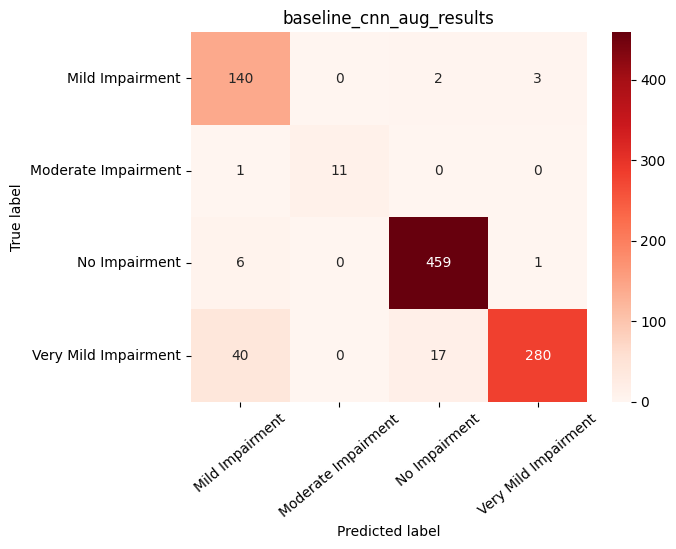

              precision    recall  f1-score   support

           0       0.75      0.97      0.84       145
           1       1.00      0.92      0.96        12
           2       0.96      0.98      0.97       466
           3       0.99      0.83      0.90       337

    accuracy                           0.93       960
   macro avg       0.92      0.92      0.92       960
weighted avg       0.94      0.93      0.93       960



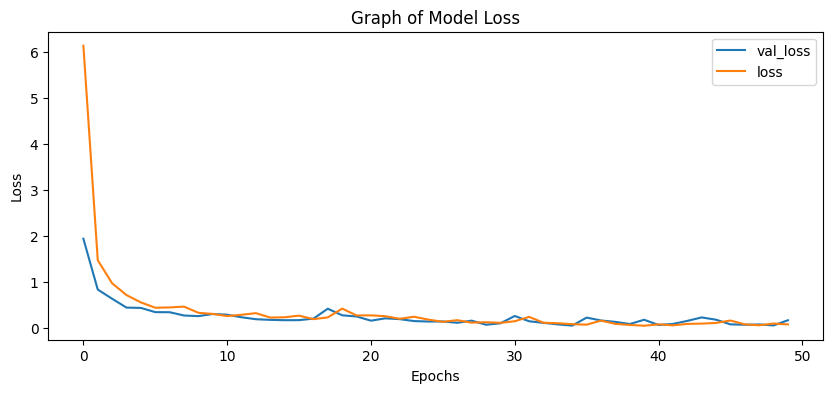

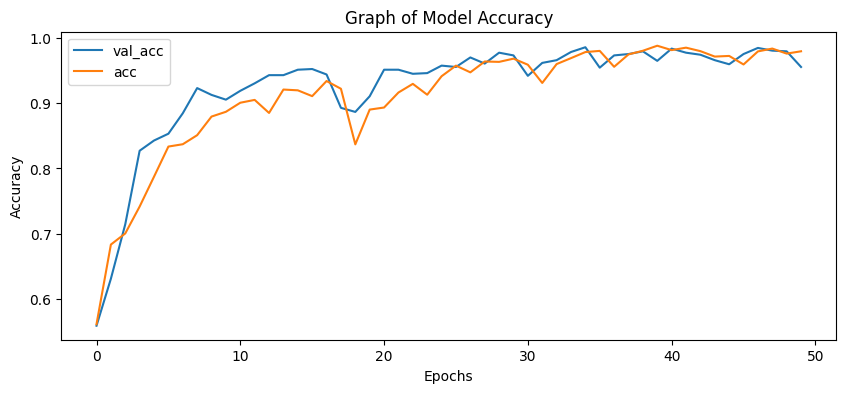

In [60]:
make_confusion_and_classification(baseline_cnn_aug, 'baseline_cnn_aug_results')
visualize_model_performance(baseline_cnn_aug_results)

## Smote

In [83]:
smote_dict = {0: 1500,
 1: 1200,
 2: 2240,
 3: 1568}

sm = SMOTE(sampling_strategy=smote_dict,random_state=42)
X_smote, y_smote = sm.fit_resample(X_train_vec, y_train)

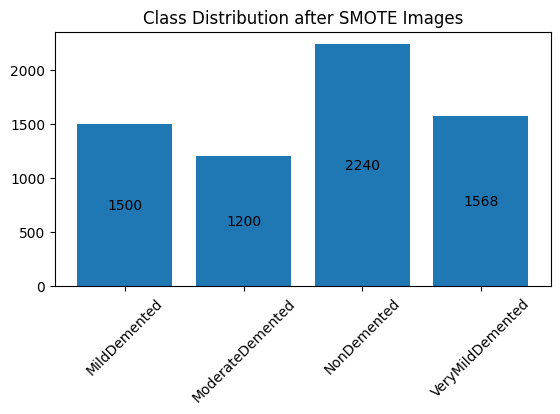

In [54]:
aug_bars = plt.bar(['MildDemented','ModerateDemented','NonDemented','VeryMildDemented'], sum(y_smote))
plt.xticks(rotation=45)
plt.bar_label(aug_bars, label_type='center')
plt.title('Class Distribution after SMOTE Images')
plt.gcf().subplots_adjust(bottom=0.35)

In [55]:
model_4_smote = Sequential()

model_4_smote.add(layers.BatchNormalization(input_shape=(150528,)))
model_4_smote.add(layers.Dropout(0.4))
model_4_smote.add(layers.Dense(128, activation='relu'))
model_4_smote.add(layers.Dense(64, activation='relu'))
model_4_smote.add(layers.Dropout(0.2))
model_4_smote.add(layers.Dense(4, activation='softmax'))

opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)

model_4_smote.compile(optimizer=opt,metrics=['accuracy'], loss='categorical_crossentropy')
model_4_smote.summary()

early_stop_aug = [EarlyStopping(monitor = 'val_accuracy', patience = 15, mode='max'),
              ModelCheckpoint(filepath='best models/cnn_smote_best_model.h5', monitor='val_accuracy', save_best_only=True)]


model_4_smote_results = model_4_smote.fit(X_smote_vec, y_smote_vec, epochs=100, batch_size=50,
                                  validation_data=(X_val_vec, y_val_vec), verbose=1, callbacks=early_stop_aug)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_1 (Bat  (None, 150528)            602112    
 chNormalization)                                                
                                                                 
 dropout_2 (Dropout)         (None, 150528)            0         
                                                                 
 dense_3 (Dense)             (None, 128)               19267712  
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 4)                 260       
                                                      

/Users/lucasf/miniconda/envs/learn-env2/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


131/131 [==============================] - 10s 77ms/step - loss: 0.4980 - accuracy: 0.7787 - val_loss: 0.6570 - val_accuracy: 0.6865
Epoch 3/100
131/131 [==============================] - 10s 79ms/step - loss: 0.4656 - accuracy: 0.7982 - val_loss: 0.5335 - val_accuracy: 0.7698
Epoch 4/100
131/131 [==============================] - 10s 78ms/step - loss: 0.3857 - accuracy: 0.8404 - val_loss: 0.4429 - val_accuracy: 0.7854
Epoch 5/100
131/131 [==============================] - 10s 80ms/step - loss: 0.3039 - accuracy: 0.8715 - val_loss: 0.2800 - val_accuracy: 0.8781
Epoch 6/100
131/131 [==============================] - 10s 80ms/step - loss: 0.2611 - accuracy: 0.8995 - val_loss: 0.2814 - val_accuracy: 0.8906
Epoch 7/100
131/131 [==============================] - 10s 79ms/step - loss: 0.2202 - accuracy: 0.9167 - val_loss: 0.2581 - val_accuracy: 0.8896
Epoch 8/100
131/131 [==============================] - 10s 75ms/step - loss: 0.2140 - accuracy: 0.9215 - val_loss: 0.2699 - val_accuracy: 0.90

131/131 [==============================] - 10s 78ms/step - loss: 0.0618 - accuracy: 0.9837 - val_loss: 0.2006 - val_accuracy: 0.9615
Epoch 59/100
131/131 [==============================] - 10s 77ms/step - loss: 0.0170 - accuracy: 0.9949 - val_loss: 0.0874 - val_accuracy: 0.9740
Epoch 60/100
131/131 [==============================] - 10s 74ms/step - loss: 0.0132 - accuracy: 0.9957 - val_loss: 0.2219 - val_accuracy: 0.9677
Epoch 61/100
131/131 [==============================] - 10s 79ms/step - loss: 0.1796 - accuracy: 0.9574 - val_loss: 0.1211 - val_accuracy: 0.9646


The Accuracy for the training group was 99.57589507102966
The Loss for the training group was 0.01942768134176731
--------------------------------------
The Accuracy for the test group was 97.81249761581421
The Loss for the test group was 0.09189557284116745
30/30 [==============================] - 0s 10ms/step


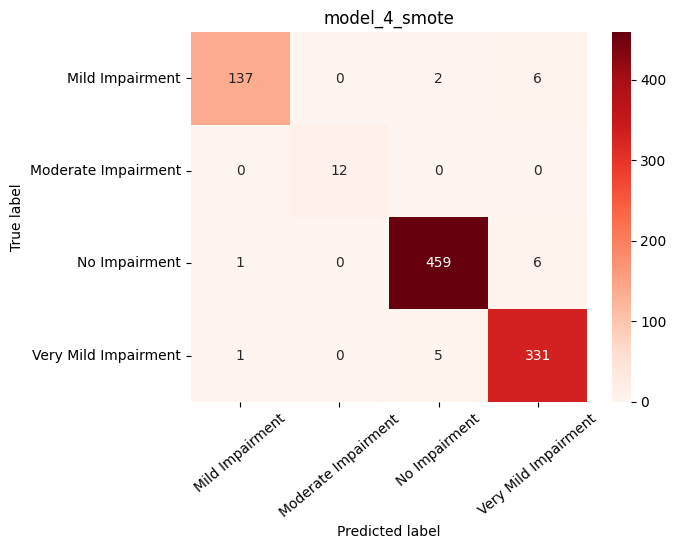

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       145
           1       1.00      1.00      1.00        12
           2       0.98      0.98      0.98       466
           3       0.97      0.98      0.97       337

    accuracy                           0.98       960
   macro avg       0.98      0.98      0.98       960
weighted avg       0.98      0.98      0.98       960



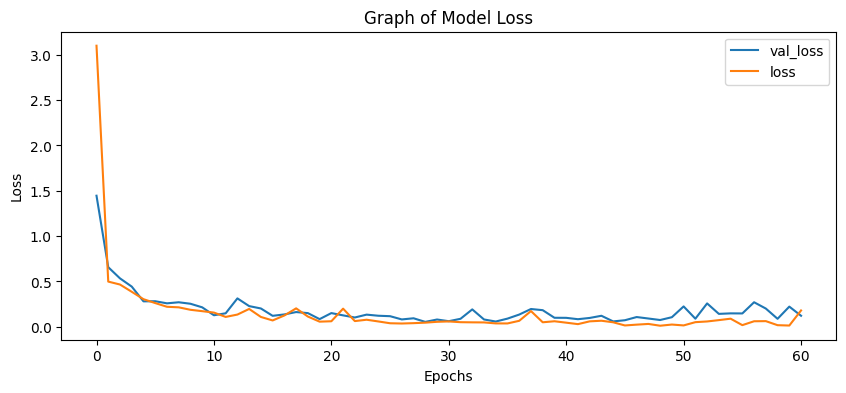

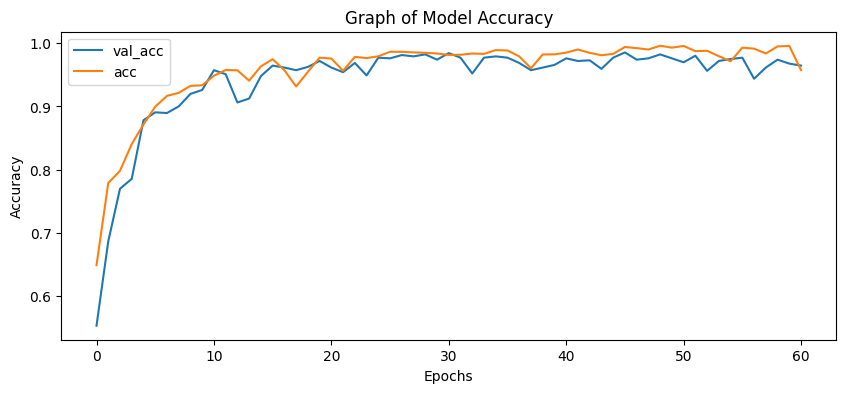

In [58]:
make_confusion_and_classification(model_4_smote, 'model_4_smote')
visualize_model_performance(model_4_smote_results)

In [93]:
#model architecture
whole_img_model = Sequential()
whole_img_model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(224, 224,  3),use_bias=True))
whole_img_model.add(layers.MaxPooling2D((2, 2)))
whole_img_model.add(layers.Conv2D(64, (3, 3), activation='relu' ,use_bias=True))
whole_img_model.add(layers.MaxPooling2D((2, 2)))
whole_img_model.add(layers.Flatten())
whole_img_model.add(layers.BatchNormalization())
whole_img_model.add(layers.Dropout(0.4))
whole_img_model.add(layers.Dense(64, activation='relu'))
whole_img_model.add(layers.Dense(32, activation='relu'))
whole_img_model.add(layers.Dense(4, activation='softmax'))

whole_img_model.summary()


opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)
whole_img_model.compile(optimizer=opt,metrics=['accuracy'], loss='categorical_crossentropy')

early_stop_whole1 = [EarlyStopping(monitor = 'val_accuracy', patience = 8, mode='max'),
              ModelCheckpoint(filepath='best models/whole_img_model_best_model.h5', monitor='val_accuracy', save_best_only=True)]

#dont forget to change
whole_img_model_res = whole_img_model.fit(X_train, y_train,
                    batch_size=50,
                    epochs=35,
                    verbose=1,
                    callbacks = early_stop_whole1,
                    validation_data=(X_val, y_val))



Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 128)     3584      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 111, 111, 128)     0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 64)      73792     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 186624)            0         
                                                                 
 batch_normalization_2 (Bat  (None, 186624)           

/Users/lucasf/miniconda/envs/learn-env2/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


90/90 [==============================] - 260s 3s/step - loss: 0.4692 - accuracy: 0.8167 - val_loss: 0.8667 - val_accuracy: 0.6510
Epoch 3/35
90/90 [==============================] - 261s 3s/step - loss: 0.2360 - accuracy: 0.9163 - val_loss: 0.5985 - val_accuracy: 0.7688
Epoch 4/35
90/90 [==============================] - 286s 3s/step - loss: 0.1371 - accuracy: 0.9556 - val_loss: 0.5518 - val_accuracy: 0.7698
Epoch 5/35
90/90 [==============================] - 280s 3s/step - loss: 0.0903 - accuracy: 0.9708 - val_loss: 0.9035 - val_accuracy: 0.7750
Epoch 6/35
90/90 [==============================] - 272s 3s/step - loss: 0.0751 - accuracy: 0.9761 - val_loss: 0.1931 - val_accuracy: 0.9302
Epoch 7/35
90/90 [==============================] - 280s 3s/step - loss: 0.0544 - accuracy: 0.9855 - val_loss: 1.3987 - val_accuracy: 0.7500
Epoch 8/35
90/90 [==============================] - 278s 3s/step - loss: 0.0510 - accuracy: 0.9839 - val_loss: 1.2340 - val_accuracy: 0.7281
Epoch 9/35
90/90 [======

The Accuracy for the training group was 92.83482432365417
The Loss for the training group was 0.23331625759601593
--------------------------------------
The Accuracy for the test group was 88.43749761581421
The Loss for the test group was 0.4301392138004303
30/30 [==============================] - 13s 413ms/step


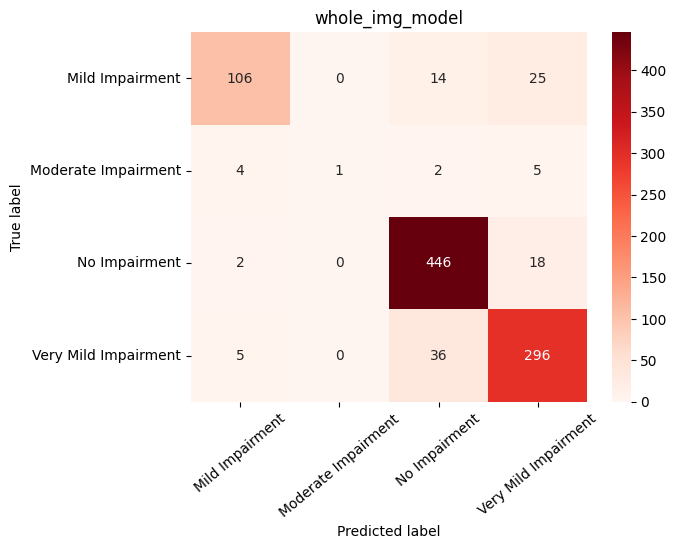

              precision    recall  f1-score   support

           0       0.91      0.73      0.81       145
           1       1.00      0.08      0.15        12
           2       0.90      0.96      0.93       466
           3       0.86      0.88      0.87       337

    accuracy                           0.88       960
   macro avg       0.92      0.66      0.69       960
weighted avg       0.89      0.88      0.88       960



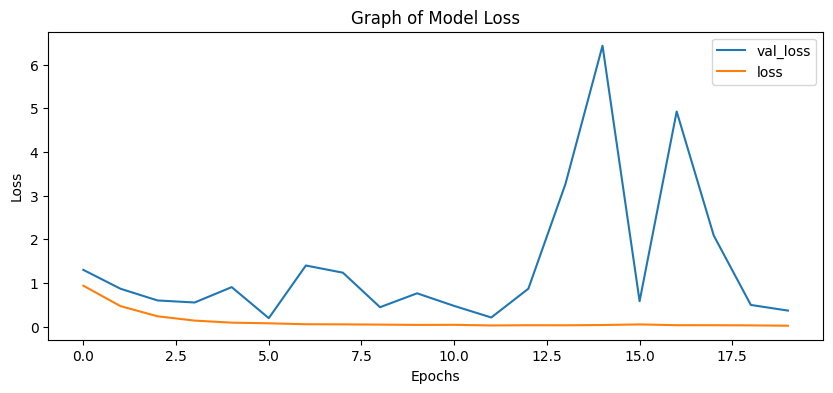

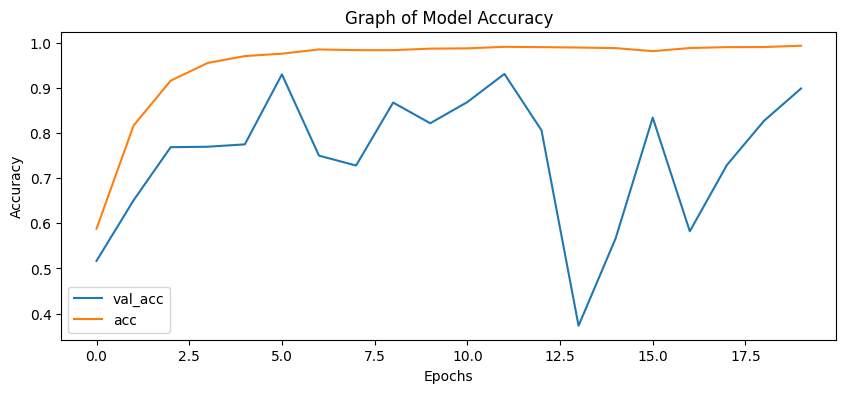

In [94]:
make_confusion_and_classification(whole_img_model, 'whole_img_model')
visualize_model_performance(whole_img_model_res)

In [95]:
batch_size = 50
epochs = 30
np.random.seed(7)


#model architecture
whole_img_model_2 = Sequential()
whole_img_model_2.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224,  3),use_bias=True))
whole_img_model_2.add(layers.MaxPooling2D((2, 2)))
whole_img_model_2.add(layers.Conv2D(32, (3, 3), activation='relu',use_bias=True))
whole_img_model_2.add(layers.MaxPooling2D((2, 2)))
whole_img_model_2.add(layers.Flatten())
whole_img_model_2.add(layers.Dense(32, activation='relu'))
whole_img_model_2.add(layers.Dense(4, activation='softmax'))

whole_img_model_2.summary()


opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)
whole_img_model_2.compile(optimizer=opt,metrics=['accuracy'], loss='categorical_crossentropy')

early_stop_whole = [EarlyStopping(monitor = 'val_accuracy', patience = 8, mode='max'),
              ModelCheckpoint(filepath='best models/whole_img_model_2_3d_best_model.h5', monitor='val_accuracy', save_best_only=True)]

#dont forget to change
whole_img_model_2_res = whole_img_model_2.fit(X_train, y_train,
                    batch_size=50,
                    epochs=35,
                    verbose=1,
                    callbacks = early_stop_whole,
                    validation_data=(X_val, y_val))



Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 111, 111, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 109, 109, 32)      18464     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 54, 54, 32)        0         
 ng2D)                                                           
                                                                 
 flatten_5 (Flatten)         (None, 93312)             0         
                                                                 
 dense_13 (Dense)            (None, 32)               

/Users/lucasf/miniconda/envs/learn-env2/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


90/90 [==============================] - 103s 1s/step - loss: 0.8490 - accuracy: 0.6138 - val_loss: 0.7225 - val_accuracy: 0.6833
Epoch 3/35
90/90 [==============================] - 102s 1s/step - loss: 0.5724 - accuracy: 0.7696 - val_loss: 0.4409 - val_accuracy: 0.8375
Epoch 4/35
90/90 [==============================] - 102s 1s/step - loss: 0.2986 - accuracy: 0.8917 - val_loss: 0.3549 - val_accuracy: 0.8552
Epoch 5/35
90/90 [==============================] - 100s 1s/step - loss: 0.1354 - accuracy: 0.9592 - val_loss: 0.1929 - val_accuracy: 0.9219
Epoch 6/35
90/90 [==============================] - 100s 1s/step - loss: 0.0687 - accuracy: 0.9801 - val_loss: 0.1321 - val_accuracy: 0.9490
Epoch 7/35
90/90 [==============================] - 98s 1s/step - loss: 0.0231 - accuracy: 0.9949 - val_loss: 0.1343 - val_accuracy: 0.9510
Epoch 8/35
90/90 [==============================] - 102s 1s/step - loss: 0.0096 - accuracy: 0.9991 - val_loss: 0.0865 - val_accuracy: 0.9729
Epoch 9/35
90/90 [=======

The Accuracy for the training group was 100.0
The Loss for the training group was 3.856161129078828e-05
--------------------------------------
The Accuracy for the test group was 98.02083373069763
The Loss for the test group was 0.09392678737640381
30/30 [==============================] - 5s 156ms/step


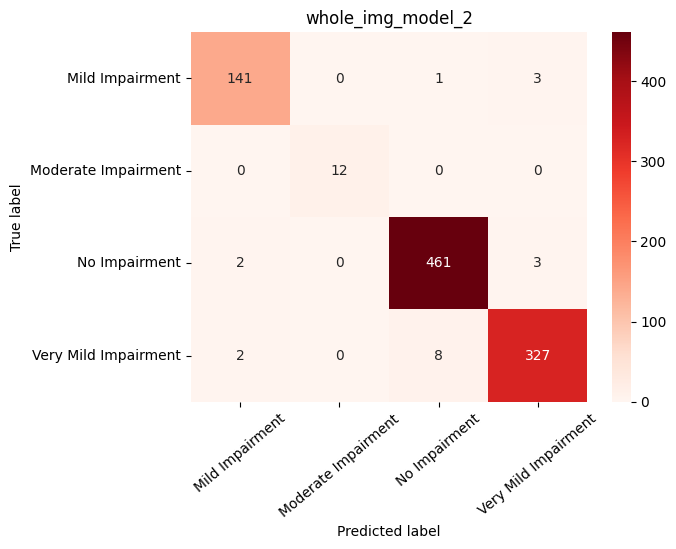

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       145
           1       1.00      1.00      1.00        12
           2       0.98      0.99      0.99       466
           3       0.98      0.97      0.98       337

    accuracy                           0.98       960
   macro avg       0.98      0.98      0.98       960
weighted avg       0.98      0.98      0.98       960



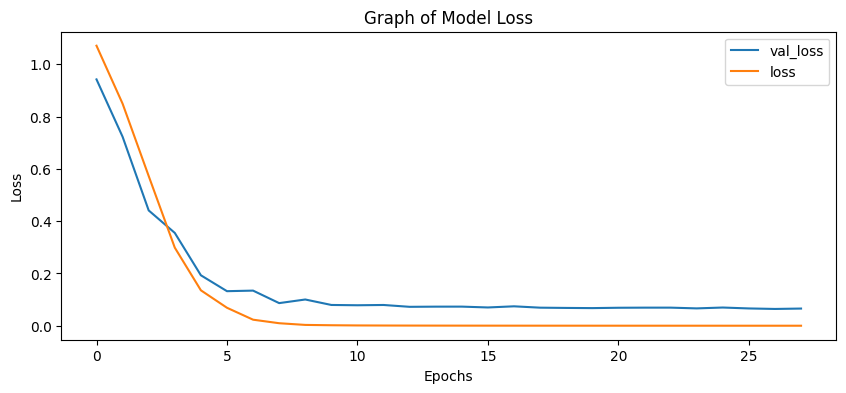

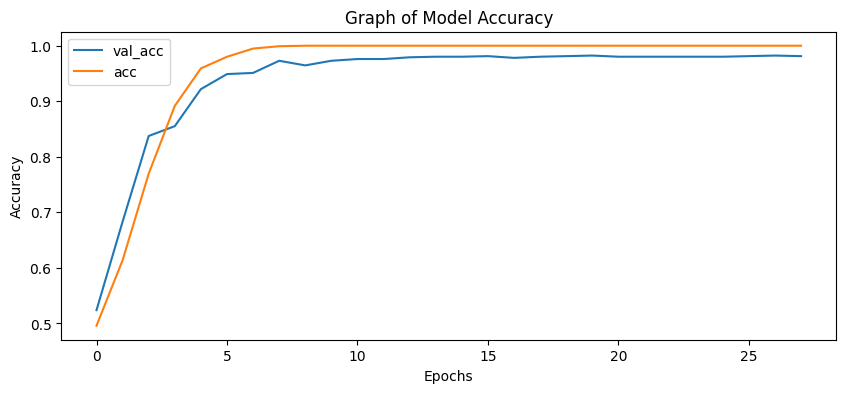

In [96]:
make_confusion_and_classification(whole_img_model_2, 'whole_img_model_2')
visualize_model_performance(whole_img_model_2_res)

30/30 [==============================] - 4s 130ms/step
The Accuracy for the training group was 100.0
The Loss for the training group was 0.00013815093552693725
--------------------------------------
The Accuracy for the test group was 97.70833253860474
The Loss for the test group was 0.09194520860910416
Recall of test group: 0.9608909934336329


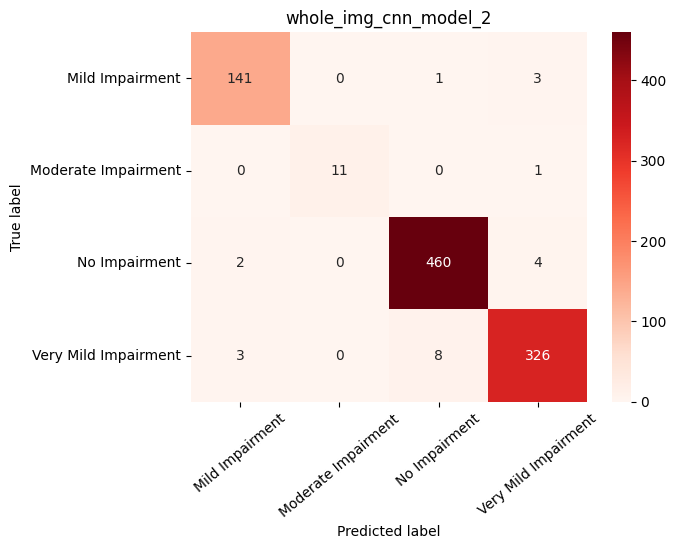

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       145
           1       1.00      0.92      0.96        12
           2       0.98      0.99      0.98       466
           3       0.98      0.97      0.97       337

    accuracy                           0.98       960
   macro avg       0.98      0.96      0.97       960
weighted avg       0.98      0.98      0.98       960



In [76]:
whole_img_cnn_model_2 = load_model('best models/whole_img_model_2_3d_best_model.h5')

make_confusion_and_classification(whole_img_cnn_model_2, 'whole_img_cnn_model_2')


In [102]:
#model architecture
whole_img_model_3 = Sequential()
whole_img_model_3.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(224, 224,  3),use_bias=True))
whole_img_model_3.add(layers.MaxPooling2D((2, 2)))
whole_img_model_3.add(layers.Conv2D(64, (3, 3), activation='relu',use_bias=True))
whole_img_model_3.add(layers.MaxPooling2D((2, 2)))
whole_img_model_3.add(layers.BatchNormalization())
whole_img_model_3.add(layers.Flatten())
whole_img_model_3.add(layers.Dropout(0.2))
whole_img_model_3.add(layers.Dense(64, activation='relu'))
whole_img_model_3.add(layers.Dense(32, activation='relu'))
whole_img_model_3.add(layers.Dense(4, activation='softmax'))

whole_img_model_3.summary()


opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)
whole_img_model_3.compile(optimizer=opt,metrics=['accuracy'], loss='categorical_crossentropy')

early_stop_whole = [EarlyStopping(monitor = 'val_accuracy', patience = 8, mode='max'),
              ModelCheckpoint(filepath='best models/whole_img_model_3_best_model.h5', monitor='val_accuracy', save_best_only=True)]

#dont forget to change
whole_img_model_3_res = whole_img_model_3.fit(X_train, y_train,
                    batch_size=50,
                    epochs=35,
                    verbose=1,
                    callbacks = early_stop_whole,
                    validation_data=(X_val, y_val))



Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 128)     3584      
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 111, 111, 128)     0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 109, 109, 64)      73792     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_5 (Bat  (None, 54, 54, 64)        256       
 chNormalization)                                                
                                                      

/Users/lucasf/miniconda/envs/learn-env2/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


90/90 [==============================] - 260s 3s/step - loss: 0.8235 - accuracy: 0.6310 - val_loss: 0.9588 - val_accuracy: 0.5448
Epoch 3/35
90/90 [==============================] - 257s 3s/step - loss: 0.6190 - accuracy: 0.7391 - val_loss: 0.7768 - val_accuracy: 0.6635
Epoch 4/35
90/90 [==============================] - 248s 3s/step - loss: 0.3991 - accuracy: 0.8355 - val_loss: 0.6522 - val_accuracy: 0.7250
Epoch 5/35
90/90 [==============================] - 249s 3s/step - loss: 0.2448 - accuracy: 0.9094 - val_loss: 0.5390 - val_accuracy: 0.7948
Epoch 6/35
90/90 [==============================] - 249s 3s/step - loss: 0.2086 - accuracy: 0.9203 - val_loss: 0.3506 - val_accuracy: 0.8521
Epoch 7/35
90/90 [==============================] - 263s 3s/step - loss: 0.1273 - accuracy: 0.9576 - val_loss: 0.2040 - val_accuracy: 0.9229
Epoch 8/35
90/90 [==============================] - 262s 3s/step - loss: 0.1264 - accuracy: 0.9556 - val_loss: 0.9636 - val_accuracy: 0.6917
Epoch 9/35
90/90 [======

30/30 [==============================] - 11s 367ms/step
The Accuracy for the training group was 99.97767806053162
The Loss for the training group was 0.0024229001719504595
--------------------------------------
The Accuracy for the test group was 97.60416746139526
The Loss for the test group was 0.08885062485933304
Recall of test group: 0.9834373980340861


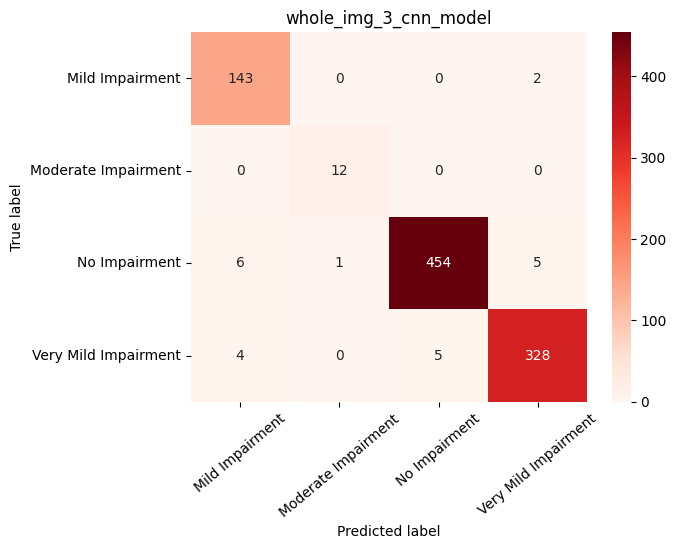

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       145
           1       0.92      1.00      0.96        12
           2       0.99      0.97      0.98       466
           3       0.98      0.97      0.98       337

    accuracy                           0.98       960
   macro avg       0.96      0.98      0.97       960
weighted avg       0.98      0.98      0.98       960



In [67]:
whole_img_3_cnn_model = load_model('best models/whole_img_model_3_best_model.h5')

make_confusion_and_classification(whole_img_3_cnn_model, 'whole_img_3_cnn_model')

In [19]:
#model architecture
whole_img_model_4 = Sequential()
whole_img_model_4.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224,  3),use_bias=True))
whole_img_model_4.add(layers.MaxPooling2D((2, 2)))
whole_img_model_4.add(layers.Conv2D(128, (3, 3), activation='relu'))
whole_img_model_4.add(layers.MaxPooling2D((2, 2)))
whole_img_model_4.add(layers.BatchNormalization())
whole_img_model_4.add(layers.Flatten())
whole_img_model_4.add(layers.Dense(64, activation='relu'))
whole_img_model_4.add(layers.Dropout(0.2))
whole_img_model_4.add(layers.Dense(32, activation='relu'))
whole_img_model_4.add(layers.Dense(4, activation='softmax'))

whole_img_model_4.summary()


opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)
whole_img_model_4.compile(optimizer=opt,metrics=['accuracy'], loss='categorical_crossentropy')

early_stop_whole = [EarlyStopping(monitor = 'val_accuracy', patience = 8, mode='max'),
              ModelCheckpoint(filepath='best models/whole_img_model_4_best_model.h5', monitor='val_accuracy', save_best_only=True)]

#dont forget to change
whole_img_model_4_res = whole_img_model_4.fit(X_train, y_train,
                    batch_size=50,
                    epochs=35,
                    verbose=1,
                    callbacks = early_stop_whole,
                    validation_data=(X_val, y_val))



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 128)       0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 54, 54, 128)       512       
 Normalization)                                                  
                                                        

NameError: name 'X_train' is not defined

In [20]:
make_confusion_and_classification(whole_img_model_4, 'whole_img_model_4')
visualize_model_performance(whole_img_model_4_res)

NameError: name 'X_train' is not defined

# Visualizing Features being Identified by CNN

https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/


In [68]:
# summarize layer names
whole_img_model_2_layers = [layer.name for layer in whole_img_model_2.layers]
whole_img_model_2_layers

NameError: name 'whole_img_model_2' is not defined

In [31]:
whole_img_model_2_layer_outputs = [layer.output for layer in whole_img_model_2.layers]
whole_img_model_2layer_outputs

AttributeError: 'list' object has no attribute 'layers'

In [ ]:
final_cnn_feat_map = 

In [34]:
# summarize filter shapes
for layer in whole_img_cnn_model.layers:
    if 'conv' not in layer.name:
        continue
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)

conv2d_2 (3, 3, 3, 64)
conv2d_3 (3, 3, 64, 32)


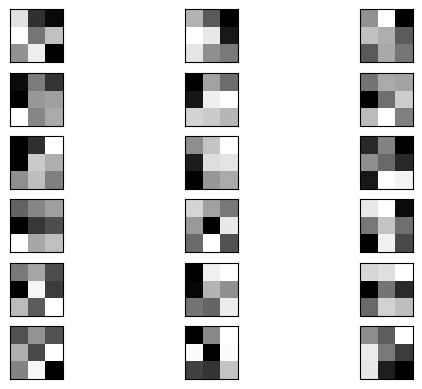

In [38]:
filters, biases = whole_img_cnn_model.layers[0].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
 # get the filter
 f = filters[:, :, :, i]
 # plot each channel separately
 for j in range(3):
 # specify subplot and turn of axis
     ax = plt.subplot(n_filters, 3, ix)
     ax.set_xticks([])
     ax.set_yticks([])
     # plot filter channel in grayscale
     plt.imshow(f[:, :, j], cmap='gray')
     ix += 1
# show the figure
plt.show()

1/1 [==============================] - 0s 19ms/step


IndexError: too many indices for array: array is 2-dimensional, but 4 were indexed

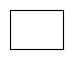

In [49]:
model = whole_img_cnn_model

# convert the image to an array
img = moderate_images[1]
# expand dimensions so that it represents a single 'sample'
img = np.expand_dims(img, axis=0)
## prepare the image (e.g. scale pixel values for the vgg)
#img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot all 64 maps in an 8x8 squares
square = 8
ix = 1
for _ in range(square):
     for _ in range(square):
 # specify subplot and turn of axis
         ax = plt.subplot(square, square, ix)
         ax.set_xticks([])
         ax.set_yticks([])
     # plot filter channel in grayscale
     plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
     ix += 1
# show the figure
pyplot.show()

conv2d_9 (3, 3, 3, 64)
64
conv2d_10 (3, 3, 64, 32)
32
1/1 [==============================] - 0s 57ms/step
(1, 111, 111, 64)
(1, 109, 109, 32)
(1, 54, 54, 32)
(1, 93312)
(1, 32)
(1, 4)


/var/folders/sq/8smv466d46zg1m9_7m_qhdk40000gn/T/ipykernel_39278/23944226.py:43: RuntimeWarning: invalid value encountered in divide
  x /= x.std ()
/var/folders/sq/8smv466d46zg1m9_7m_qhdk40000gn/T/ipykernel_39278/23944226.py:46: RuntimeWarning: invalid value encountered in cast
  x  = np.clip(x, 0, 255).astype('uint8')


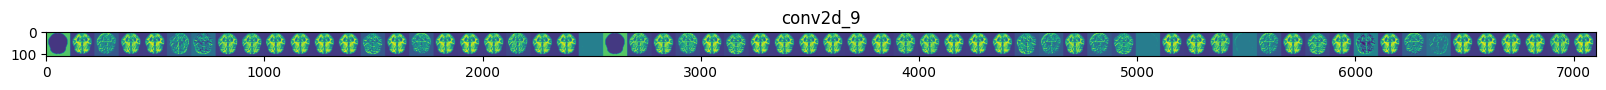

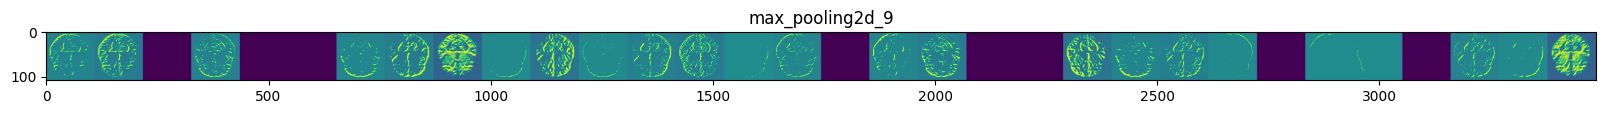

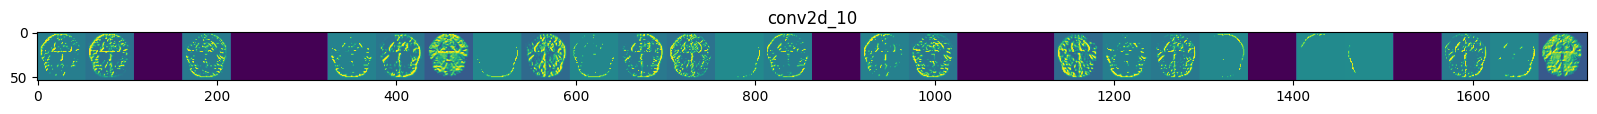

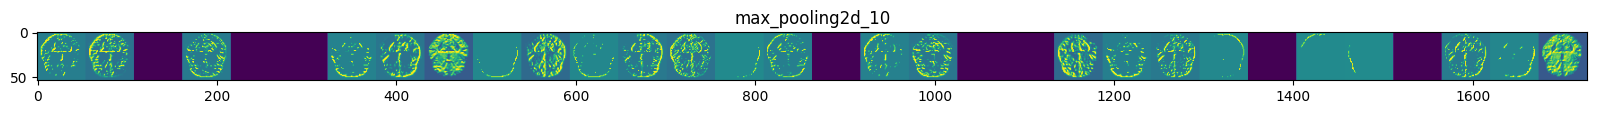

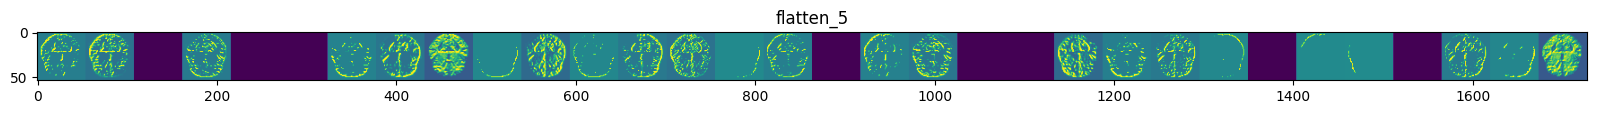

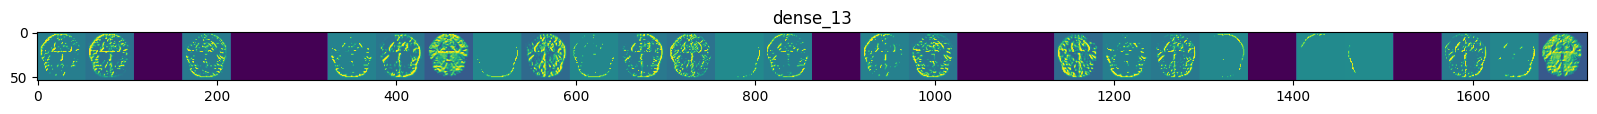

In [81]:
# get layer weights and filters from model
for layer in whole_img_cnn_model_2.layers:
    if 'conv' in layer.name:
        filters, bias= layer.get_weights()
        print(layer.name, filters.shape)
         #normalize filter values between  0 and 1 for visualization
        f_min, f_max = filters.min(), filters.max()
        filters = (filters - f_min) / (f_max - f_min)  
        print(filters.shape[3])
        axis_x=1

#use image above to run through model

#create visualization model to demonstrate what features CNN is learning 
#at each layer
successive_outputs = [layer.output for layer in whole_img_cnn_model_2.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = whole_img_cnn_model_2.input, outputs = successive_outputs)

x   = X_train[70]                     # Moderate image array with shape (224, 224, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 224, 224, 3)

# Run image through visualization model
successive_feature_maps = visualization_model.predict(x)

layer_names = [layer.name for layer in whole_img_cnn_model_2.layers]

# display representations at each layer
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    print(feature_map.shape)
    if len(feature_map.shape) == 4:
    
        # Isolate only the conv / maxpool layers, not the fully-connected layers
        n_features = feature_map.shape[-1]  # number of features in the feature map
        size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)

        # Tile images in matrix
        display_grid = np.zeros((size, size * n_features))

    #create grid
        for i in range(n_features):
            x  = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std ()
            x *=  64
            x += 128
            x  = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    # Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )